In [2]:

using SQLite
using DataFrames
using Dates


In [3]:
db = SQLite.DB()

SQLite.DB(":memory:")

In [13]:
db_file = SQLite.DB("customer_data.sqlite")


SQLite.DB("customer_data.sqlite")

In [14]:
SQLite.tables(db_file)

SQLite.DBTable[]

In [15]:
SQLite.execute(db_file, """
    CREATE TABLE IF NOT EXISTS customers (
        customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL,
        email TEXT UNIQUE,
        age INTEGER CHECK (age >= 18),
        income REAL,
        is_active BOOLEAN DEFAULT 1,
        registration_date DATE,
        last_purchase_timestamp DATETIME,
        notes TEXT
    )
""")

101

In [16]:
SQLite.execute(db_file, """
    CREATE TABLE IF NOT EXISTS product_categories (
        category_id INTEGER PRIMARY KEY AUTOINCREMENT,
        category_name TEXT NOT NULL UNIQUE,
        description TEXT,
        created_at DATETIME DEFAULT CURRENT_TIMESTAMP
    )
""")

101

In [17]:
SQLite.execute(db_file, """
    CREATE TABLE IF NOT EXISTS products (
        product_id INTEGER PRIMARY KEY AUTOINCREMENT,
        product_name TEXT NOT NULL,
        category_id INTEGER,
        price REAL NOT NULL CHECK (price > 0),
        stock_quantity INTEGER DEFAULT 0,
        is_available BOOLEAN DEFAULT 1,
        created_at DATETIME DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (category_id) REFERENCES product_categories(category_id)
    )
""")

101

In [18]:
SQLite.execute(db_file, """
    CREATE TABLE IF NOT EXISTS purchases (
        purchase_id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_id INTEGER,
        product_id INTEGER,
        purchase_date DATETIME DEFAULT CURRENT_TIMESTAMP,
        quantity INTEGER DEFAULT 1,
        total_price REAL,
        FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
        FOREIGN KEY (product_id) REFERENCES products(product_id)
    )
""")

101

In [19]:
SQLite.execute(db_file, """
    INSERT INTO customers 
    (first_name, last_name, email, age, income, is_active, registration_date, last_purchase_timestamp, notes)
    VALUES 
    ('John', 'Doe', 'john.doe@example.com', 35, 75000.50, 1, '2023-01-15', '2023-06-20 14:30:45', 'Regular customer')
""")

101

In [20]:
customers_data = [
    ("Jane", "Smith", "jane.smith@example.com", 28, 62000.75, 1, "2023-02-10", "2023-06-18 09:15:30", "Prefers email contact"),
    ("Robert", "Johnson", "robert.j@example.com", 42, 95000.00, 1, "2023-01-05", "2023-06-15 16:45:20", "VIP customer"),
    ("Emily", "Williams", "emily.w@example.com", 31, 68000.25, 0, "2023-03-20", "2023-05-10 11:30:15", "Inactive since May"),
    ("Michael", "Brown", "michael.b@example.com", 39, 82000.50, 1, "2023-02-25", "2023-06-19 13:20:10", "Frequent buyer")
]

4-element Vector{Tuple{String, String, String, Int64, Float64, Int64, String, String, String}}:
 ("Jane", "Smith", "jane.smith@example.com", 28, 62000.75, 1, "2023-02-10", "2023-06-18 09:15:30", "Prefers email contact")
 ("Robert", "Johnson", "robert.j@example.com", 42, 95000.0, 1, "2023-01-05", "2023-06-15 16:45:20", "VIP customer")
 ("Emily", "Williams", "emily.w@example.com", 31, 68000.25, 0, "2023-03-20", "2023-05-10 11:30:15", "Inactive since May")
 ("Michael", "Brown", "michael.b@example.com", 39, 82000.5, 1, "2023-02-25", "2023-06-19 13:20:10", "Frequent buyer")

In [21]:
for customer in customers_data
    SQLite.execute(db_file, """
        INSERT INTO customers 
        (first_name, last_name, email, age, income, is_active, registration_date, last_purchase_timestamp, notes)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, customer)
end
println("Multiple rows inserted into customers table using parameters")


Multiple rows inserted into customers table using parameters


In [22]:
categories_data = [
    ("Electronics", "Electronic devices and accessories"),
    ("Clothing", "Apparel and fashion items"),
    ("Home & Kitchen", "Household and kitchen products"),
    ("Books", "Books, e-books, and publications")
]

4-element Vector{Tuple{String, String}}:
 ("Electronics", "Electronic devices and accessories")
 ("Clothing", "Apparel and fashion items")
 ("Home & Kitchen", "Household and kitchen products")
 ("Books", "Books, e-books, and publications")

In [23]:
for category in categories_data
    SQLite.execute(db_file, """
        INSERT INTO product_categories 
        (category_name, description)
        VALUES (?, ?)
    """, category)
end
println("Data inserted into product_categories table")


Data inserted into product_categories table


In [24]:
products_data = [
    ("Smartphone", 1, 899.99, 50, 1),
    ("Laptop", 1, 1299.99, 30, 1),
    ("Headphones", 1, 199.99, 100, 1),
    ("T-shirt", 2, 24.99, 200, 1),
    ("Jeans", 2, 49.99, 150, 1),
    ("Coffee Maker", 3, 89.99, 40, 1),
    ("Blender", 3, 69.99, 25, 1),
    ("Novel", 4, 14.99, 300, 1),
    ("Cookbook", 4, 29.99, 75, 1),
    ("Tablet", 1, 499.99, 0, 0)
]

10-element Vector{Tuple{String, Int64, Float64, Int64, Int64}}:
 ("Smartphone", 1, 899.99, 50, 1)
 ("Laptop", 1, 1299.99, 30, 1)
 ("Headphones", 1, 199.99, 100, 1)
 ("T-shirt", 2, 24.99, 200, 1)
 ("Jeans", 2, 49.99, 150, 1)
 ("Coffee Maker", 3, 89.99, 40, 1)
 ("Blender", 3, 69.99, 25, 1)
 ("Novel", 4, 14.99, 300, 1)
 ("Cookbook", 4, 29.99, 75, 1)
 ("Tablet", 1, 499.99, 0, 0)

In [25]:

for product in products_data
    SQLite.execute(db_file, """
        INSERT INTO products 
        (product_name, category_id, price, stock_quantity, is_available)
        VALUES (?, ?, ?, ?, ?)
    """, product)
end

In [26]:
purchases_data = [
    (1, 1, "2023-06-20 14:30:45", 1, 899.99),
    (1, 7, "2023-05-15 10:20:30", 1, 69.99),
    (2, 4, "2023-06-18 09:15:30", 2, 49.98),
    (2, 9, "2023-06-10 16:45:20", 1, 29.99),
    (3, 2, "2023-05-05 11:30:15", 1, 1299.99),
    (3, 8, "2023-04-20 13:10:45", 3, 44.97),
    (4, 5, "2023-05-10 11:30:15", 1, 49.99),
    (5, 3, "2023-06-19 13:20:10", 1, 199.99),
    (5, 6, "2023-06-15 15:45:30", 1, 89.99),
    (5, 1, "2023-06-01 09:30:15", 1, 899.99)
]

for purchase in purchases_data
    SQLite.execute(db_file, """
        INSERT INTO purchases 
        (customer_id, product_id, purchase_date, quantity, total_price)
        VALUES (?, ?, ?, ?, ?)
    """, purchase)
end

In [27]:
customers_df = DBInterface.execute(db_file, "SELECT * FROM customers") |> DataFrame
println(customers_df)


5×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                 
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       35  75000.5          1  2023-01-15         2023-06-20 14:30:45      Regular customer
   2 │           2  Jane        Smith      jane.smith@example.com     28  62000.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          1  2023-01-05         2023-06-15 16:45:20      VIP customer
   4 │           4  Emily       Will

In [28]:
categories_df = DBInterface.execute(db_file, "SELECT * FROM product_categories") |> DataFrame
println(categories_df)


4×4 DataFrame
 Row │ category_id  category_name   description                        created_at          
     │ Int64        String          String                             String              
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │           1  Electronics     Electronic devices and accessori…  2025-04-09 14:01:10
   2 │           2  Clothing        Apparel and fashion items          2025-04-09 14:01:10
   3 │           3  Home & Kitchen  Household and kitchen products     2025-04-09 14:01:10
   4 │           4  Books           Books, e-books, and publications   2025-04-09 14:01:10


In [29]:
products_df = DBInterface.execute(db_file, "SELECT * FROM products") |> DataFrame
println(products_df)


10×7 DataFrame
 Row │ product_id  product_name  category_id  price    stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64  Int64           Int64         String              
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   899.99              50             1  2025-04-09 14:01:34
   2 │          2  Laptop                  1  1299.99              30             1  2025-04-09 14:01:34
   3 │          3  Headphones              1   199.99             100             1  2025-04-09 14:01:34
   4 │          4  T-shirt                 2    24.99             200             1  2025-04-09 14:01:34
   5 │          5  Jeans                   2    49.99             150             1  2025-04-09 14:01:34
   6 │          6  Coffee Maker            3    89.99              40             1  2025-04-09 14:01:34
   7 │          7  Blender           

In [30]:
purchases_df = DBInterface.execute(db_file, "SELECT * FROM purchases") |> DataFrame
println(purchases_df)


10×6 DataFrame
 Row │ purchase_id  customer_id  product_id  purchase_date        quantity  total_price 
     │ Int64        Int64        Int64       String               Int64     Float64     
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │           1            1           1  2023-06-20 14:30:45         1       899.99
   2 │           2            1           7  2023-05-15 10:20:30         1        69.99
   3 │           3            2           4  2023-06-18 09:15:30         2        49.98
   4 │           4            2           9  2023-06-10 16:45:20         1        29.99
   5 │           5            3           2  2023-05-05 11:30:15         1      1299.99
   6 │           6            3           8  2023-04-20 13:10:45         3        44.97
   7 │           7            4           5  2023-05-10 11:30:15         1        49.99
   8 │           8            5           3  2023-06-19 13:20:10         1       199.99
   9 │        

In [31]:
df = DataFrame(
    id = 1:5,
    name = ["Alice", "Bob", "Charlie", "David", "Eve"],
    score = [95.5, 82.3, 88.7, 90.1, 76.8],
    passed = [true, true, true, true, false]
)
println("Created DataFrame:")
println(df)


Created DataFrame:
5×4 DataFrame
 Row │ id     name     score    passed 
     │ Int64  String   Float64  Bool   
─────┼─────────────────────────────────
   1 │     1  Alice       95.5    true
   2 │     2  Bob         82.3    true
   3 │     3  Charlie     88.7    true
   4 │     4  David       90.1    true
   5 │     5  Eve         76.8   false


In [33]:
SQLite.load!(df, db_file, "test_scores")
println("Table created from DataFrame")

Table created from DataFrame


In [34]:
scores_df = DBInterface.execute(db_file, "SELECT * FROM test_scores") |> DataFrame
println("\nTest Scores table:")
println(scores_df)


Test Scores table:
10×4 DataFrame
 Row │ id     name     score    passed 
     │ Int64  String   Float64  Int64  
─────┼─────────────────────────────────
   1 │     1  Alice       95.5       1
   2 │     2  Bob         82.3       1
   3 │     3  Charlie     88.7       1
   4 │     4  David       90.1       1
   5 │     5  Eve         76.8       0
   6 │     1  Alice       95.5       1
   7 │     2  Bob         82.3       1
   8 │     3  Charlie     88.7       1
   9 │     4  David       90.1       1
  10 │     5  Eve         76.8       0


In [36]:
println("connecting to the existing database")
db = SQLite.DB("customer_data.sqlite")
println("connected to db: customer_data.sqlite")

connecting to the existing database
connected to db: customer_data.sqlite


In [37]:
customers_df = DBInterface.execute(db, "SELECT * FROM customers") |> DataFrame
println(customers_df)

5×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                 
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       35  75000.5          1  2023-01-15         2023-06-20 14:30:45      Regular customer
   2 │           2  Jane        Smith      jane.smith@example.com     28  62000.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          1  2023-01-05         2023-06-15 16:45:20      VIP customer
   4 │           4  Emily       Will

In [38]:
SQLite.execute(db, """
    UPDATE customers 
    SET income = 78000.00, notes = 'Regular customer, recently received a promotion'
    WHERE customer_id = 1
""")
println("updated customer with ID 1")

updated customer with ID 1


In [39]:
updated_customer = DBInterface.execute(db, "SELECT * FROM customers WHERE customer_id = 1") |> DataFrame
println(updated_customer)

1×10 DataFrame
 Row │ customer_id  first_name  last_name  email                 age    income   is_active  registration_date  last_purchase_timestamp  notes                             
     │ Int64        String      String     String                Int64  Float64  Int64      String             String                   String                            
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com     35  78000.0          1  2023-01-15         2023-06-20 14:30:45      Regular customer, recently recei…


In [40]:
SQLite.execute(db, """
    UPDATE customers 
    SET is_active = 0
    WHERE age > 40
""")
println("updated customers older than 40 to inactive status")

updated customers older than 40 to inactive status


In [41]:
println("verify  updates:")
updated_customers = DBInterface.execute(db, "SELECT customer_id, first_name, last_name, age, is_active FROM customers") |> DataFrame
println(updated_customers)

verify  updates:
5×5 DataFrame
 Row │ customer_id  first_name  last_name  age    is_active 
     │ Int64        String      String     Int64  Int64     
─────┼──────────────────────────────────────────────────────
   1 │           1  John        Doe           35          1
   2 │           2  Jane        Smith         28          1
   3 │           3  Robert      Johnson       42          0
   4 │           4  Emily       Williams      31          0
   5 │           5  Michael     Brown         39          1


In [42]:

println("conditional update with CASE statement")
SQLite.execute(db, """
    UPDATE customers 
    SET income = CASE 
                    WHEN age < 30 THEN income * 1.05  -- 5% increase for younger customers
                    WHEN age >= 30 AND age < 40 THEN income * 1.03  -- 3% increase for middle-aged
                    ELSE income  -- No change for others
                 END
""")
println("apply conditional income updates based on age")

conditional update with CASE statement
apply conditional income updates based on age


In [43]:
income_updates = DBInterface.execute(db, "SELECT customer_id, first_name, last_name, age, income FROM customers") |> DataFrame
println(income_updates)

5×5 DataFrame
 Row │ customer_id  first_name  last_name  age    income  
     │ Int64        String      String     Int64  Float64 
─────┼────────────────────────────────────────────────────
   1 │           1  John        Doe           35  80340.0
   2 │           2  Jane        Smith         28  65100.8
   3 │           3  Robert      Johnson       42  95000.0
   4 │           4  Emily       Williams      31  70040.3
   5 │           5  Michael     Brown         39  84460.5


In [38]:

SQLite.execute(db, "DELETE FROM customers WHERE email = 'emily.w@example.com'")
println("Deleted customer with email emily.w@example.com")

Deleted customer with email emily.w@example.com


In [39]:
remaining_customers = DBInterface.execute(db, "SELECT * FROM customers") |> DataFrame
println(remaining_customers)

4×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                             
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                            
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       35  80340.0          1  2023-01-15         2023-06-20 14:30:45      Regular customer, recently recei…
   2 │           2  Jane        Smith      jane.smith@example.com     28  65100.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          0  2023-01-05         2023-06-15 16:45:20  

# transactions, very important!!!

In [ ]:
SQLite.execute(db, """
BEGIN TRANSACTION;
""");

...
...
SQLite.execute(db, """
COMMIT TRANSACTION;
""");

SQLite.execute(db, """
ROLLBACK;
""");



In [40]:
#use transactions for batch operations

println("starting a transaction...!")

#begin transaction
SQLite.transaction(db) do
    #update product prices with a 10% increase for electronics
    SQLite.execute(db, """
        UPDATE products 
        SET price = price * 1.10
        WHERE category_id = 1
    """)
    println("updated electronics prices with 10% increase")
    
    #add a new customer
    SQLite.execute(db, """
        INSERT INTO customers 
        (first_name, last_name, email, age, income, is_active, registration_date, last_purchase_timestamp, notes)
        VALUES 
        ('Sarah', 'Johnson', 'sarah.j@example.com', 33, 71000.00, 1, '2023-06-01', '2023-06-25 10:15:30', 'New customer')
    """)
    println("added new customer: Sarah Johnson")
    
    #add a purchase for the new customer
    SQLite.execute(db, """
        INSERT INTO purchases 
        (customer_id, product_id, purchase_date, quantity, total_price)
        VALUES 
        ((SELECT customer_id FROM customers WHERE email = 'sarah.j@example.com'), 
         3, '2023-06-25 10:15:30', 1, 
         (SELECT price FROM products WHERE product_id = 3))
    """)
    println("added purchase for the new customer")
end
println("transaction completed successfully")


starting a transaction...!
updated electronics prices with 10% increase
added new customer: Sarah Johnson
added purchase for the new customer
transaction completed successfully


In [41]:
#verify the transaction results

updated_products = DBInterface.execute(db, "SELECT * FROM products WHERE category_id = 1") |> DataFrame
println(updated_products)

4×7 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64   Int64           Int64         String              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34
   2 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34
   3 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34
   4 │         10  Tablet                  1   549.989               0             0  2025-04-07 03:25:34


In [42]:
new_customer = DBInterface.execute(db, "SELECT * FROM customers WHERE email = 'sarah.j@example.com'") |> DataFrame
println(new_customer)

1×10 DataFrame
 Row │ customer_id  first_name  last_name  email                age    income   is_active  registration_date  last_purchase_timestamp  notes        
     │ Int64        String      String     String               Int64  Float64  Int64      String             String                   String       
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           6  Sarah       Johnson    sarah.j@example.com     33  71000.0          1  2023-06-01         2023-06-25 10:15:30      New customer


In [43]:
new_purchase = DBInterface.execute(db, """
    SELECT p.purchase_id, c.first_name, c.last_name, pr.product_name, p.purchase_date, p.quantity, p.total_price
    FROM purchases p
    JOIN customers c ON p.customer_id = c.customer_id
    JOIN products pr ON p.product_id = pr.product_id
    WHERE c.email = 'sarah.j@example.com'
""") |> DataFrame
println(new_purchase)

1×7 DataFrame
 Row │ purchase_id  first_name  last_name  product_name  purchase_date        quantity  total_price 
     │ Int64        String      String     String        String               Int64     Float64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────
   1 │          11  Sarah       Johnson    Headphones    2023-06-25 10:15:30         1      219.989


In [44]:
#prepare a statement for updating product stock
println("preparing statement for updating product stock")
stmt = SQLite.Stmt(db, "UPDATE products SET stock_quantity = stock_quantity + ? WHERE product_id = ?")

#batch stock updates
stock_updates = [
    (10, 1), #add 10 to product_id 1
    (15, 2), #add 15 to product_id 2
    (5, 3), #add 5 to product_id 3
    (20, 4) #add 20 to product_id 4
]

#execute batch updates
for update in stock_updates
    SQLite.bind!(stmt, update)
    SQLite.execute(stmt)
end
println("executed batch stock updates")


preparing statement for updating product stock


SQLiteException: SQLiteException("values should be provided for all query placeholders")

In [45]:

updated_stock = DBInterface.execute(db, "SELECT product_id, product_name, stock_quantity FROM products WHERE product_id IN (1, 2, 3, 4)") |> DataFrame
println(updated_stock)

4×3 DataFrame
 Row │ product_id  product_name  stock_quantity 
     │ Int64       String        Int64          
─────┼──────────────────────────────────────────
   1 │          1  Smartphone                50
   2 │          2  Laptop                    30
   3 │          3  Headphones               100
   4 │          4  T-shirt                  200


In [46]:

try
    SQLite.transaction(db) do
        #will succeed
        SQLite.execute(db, """
            UPDATE products 
            SET product_name = 'Premium Headphones'
            WHERE product_id = 3
        """)
        println("Updated product name for product_id 3")
        
        #will fail due to UNIQUE constraint on email
        SQLite.execute(db, """
            INSERT INTO customers 
            (first_name, last_name, email, age, income, is_active)
            VALUES 
            ('Duplicate', 'User', 'john.doe@example.com', 25, 60000.00, 1)
        """)
        println("This line won't execute due to the error above")
    end
catch e
    println("Transaction failed and was rolled back: ", e)
end

Updated product name for product_id 3
Transaction failed and was rolled back: SQLiteException("UNIQUE constraint failed: customers.email")


In [47]:
#check transaction rollback

product_name = DBInterface.execute(db, "SELECT product_name FROM products WHERE product_id = 3") |> DataFrame

println("product name for product_id 3: ", product_name.product_name[1])

println("transaction was rolled back, the name should NOT be 'Premium Headphones'")

product name for product_id 3: Headphones
transaction was rolled back, the name should NOT be 'Premium Headphones'


In [48]:

#upsert operation (INSERT OR REPLACE)

SQLite.execute(db, """
    INSERT OR REPLACE INTO customers 
    (customer_id, first_name, last_name, email, age, income, is_active, registration_date, last_purchase_timestamp, notes)
    VALUES 
    (1, 'John', 'Doe', 'john.doe@example.com', 36, 80000.00, 1, '2023-01-15', '2023-06-28 09:30:00', 'Customer information updated')
""")

println("performed upsert operation for customer_id 1")


performed upsert operation for customer_id 1


In [49]:
upserted_customer = DBInterface.execute(db, "SELECT * FROM customers WHERE customer_id = 1") |> DataFrame
println(upserted_customer)

1×10 DataFrame
 Row │ customer_id  first_name  last_name  email                 age    income   is_active  registration_date  last_purchase_timestamp  notes                        
     │ Int64        String      String     String                Int64  Float64  Int64      String             String                   String                       
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com     36  80000.0          1  2023-01-15         2023-06-28 09:30:00      Customer information updated


In [50]:
final_customers = DBInterface.execute(db, "SELECT * FROM customers") |> DataFrame
println(final_customers)

5×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                        
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                       
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       36  80000.0          1  2023-01-15         2023-06-28 09:30:00      Customer information updated
   2 │           2  Jane        Smith      jane.smith@example.com     28  65100.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          0  2023-01-05         2023-06-15 16:45:20      VIP customer
   

In [51]:
final_products = DBInterface.execute(db, "SELECT * FROM products") |> DataFrame
println(final_products)

10×7 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64   Int64           Int64         String              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34
   2 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34
   3 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34
   4 │          4  T-shirt                 2    24.99              200             1  2025-04-07 03:25:34
   5 │          5  Jeans                   2    49.99              150             1  2025-04-07 03:25:34
   6 │          6  Coffee Maker            3    89.99               40             1  2025-04-07 03:25:34
   7 │          7  Blender  

In [52]:
final_purchases = DBInterface.execute(db, "SELECT * FROM purchases") |> DataFrame
println(final_purchases)

11×6 DataFrame
 Row │ purchase_id  customer_id  product_id  purchase_date        quantity  total_price 
     │ Int64        Int64        Int64       String               Int64     Float64     
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │           1            1           1  2023-06-20 14:30:45         1      899.99
   2 │           2            1           7  2023-05-15 10:20:30         1       69.99
   3 │           3            2           4  2023-06-18 09:15:30         2       49.98
   4 │           4            2           9  2023-06-10 16:45:20         1       29.99
   5 │           5            3           2  2023-05-05 11:30:15         1     1299.99
   6 │           6            3           8  2023-04-20 13:10:45         3       44.97
   7 │           7            4           5  2023-05-10 11:30:15         1       49.99
   8 │           8            5           3  2023-06-19 13:20:10         1      199.99
   9 │           9    

In [53]:
all_customers = DBInterface.execute(db, "SELECT * FROM customers") |> DataFrame
println(all_customers)

5×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                        
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                       
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       36  80000.0          1  2023-01-15         2023-06-28 09:30:00      Customer information updated
   2 │           2  Jane        Smith      jane.smith@example.com     28  65100.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          0  2023-01-05         2023-06-15 16:45:20      VIP customer
   

In [54]:
customer_names = DBInterface.execute(db, "SELECT customer_id, first_name, last_name FROM customers") |> DataFrame
println(customer_names)

5×3 DataFrame
 Row │ customer_id  first_name  last_name 
     │ Int64        String      String    
─────┼────────────────────────────────────
   1 │           1  John        Doe
   2 │           2  Jane        Smith
   3 │           3  Robert      Johnson
   4 │           5  Michael     Brown
   5 │           6  Sarah       Johnson


In [55]:
customer_aliases = DBInterface.execute(db, """
    SELECT 
        customer_id AS ID, 
        first_name || ' ' || last_name AS FullName, 
        email AS EmailAddress
    FROM customers
""") |> DataFrame
println(customer_aliases)

5×3 DataFrame
 Row │ ID     FullName        EmailAddress           
     │ Int64  String          String                 
─────┼───────────────────────────────────────────────
   1 │     1  John Doe        john.doe@example.com
   2 │     2  Jane Smith      jane.smith@example.com
   3 │     3  Robert Johnson  robert.j@example.com
   4 │     5  Michael Brown   michael.b@example.com
   5 │     6  Sarah Johnson   sarah.j@example.com


In [56]:
age_filter = DBInterface.execute(db, "SELECT * FROM customers WHERE age = 36") |> DataFrame
println(age_filter)

1×10 DataFrame
 Row │ customer_id  first_name  last_name  email                 age    income   is_active  registration_date  last_purchase_timestamp  notes                        
     │ Int64        String      String     String                Int64  Float64  Int64      String             String                   String                       
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com     36  80000.0          1  2023-01-15         2023-06-28 09:30:00      Customer information updated


In [57]:
income_filter = DBInterface.execute(db, "SELECT customer_id, first_name, last_name, income FROM customers WHERE income > 70000") |> DataFrame
println(income_filter)

4×4 DataFrame
 Row │ customer_id  first_name  last_name  income  
     │ Int64        String      String     Float64 
─────┼─────────────────────────────────────────────
   1 │           1  John        Doe        80000.0
   2 │           3  Robert      Johnson    95000.0
   3 │           5  Michael     Brown      84460.5
   4 │           6  Sarah       Johnson    71000.0


In [58]:
multiple_filter = DBInterface.execute(db, """
    SELECT customer_id, first_name, last_name, age, is_active 
    FROM customers 
    WHERE age < 35 AND is_active = 1
""") |> DataFrame
println(multiple_filter)

2×5 DataFrame
 Row │ customer_id  first_name  last_name  age    is_active 
     │ Int64        String      String     Int64  Int64     
─────┼──────────────────────────────────────────────────────
   1 │           2  Jane        Smith         28          1
   2 │           6  Sarah       Johnson       33          1


In [59]:
or_filter = DBInterface.execute(db, """
    SELECT customer_id, first_name, last_name, income, is_active 
    FROM customers 
    WHERE is_active = 0 OR income > 80000
""") |> DataFrame
println(or_filter)

2×5 DataFrame
 Row │ customer_id  first_name  last_name  income   is_active 
     │ Int64        String      String     Float64  Int64     
─────┼────────────────────────────────────────────────────────
   1 │           3  Robert      Johnson    95000.0          0
   2 │           5  Michael     Brown      84460.5          1


In [60]:
like_filter = DBInterface.execute(db, """
    SELECT customer_id, first_name, last_name, email 
    FROM customers 
    WHERE email LIKE '%example.com'
""") |> DataFrame
println(like_filter)

5×4 DataFrame
 Row │ customer_id  first_name  last_name  email                  
     │ Int64        String      String     String                 
─────┼────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com
   2 │           2  Jane        Smith      jane.smith@example.com
   3 │           3  Robert      Johnson    robert.j@example.com
   4 │           5  Michael     Brown      michael.b@example.com
   5 │           6  Sarah       Johnson    sarah.j@example.com


In [61]:
in_filter = DBInterface.execute(db, """
    SELECT product_id, product_name, category_id 
    FROM products 
    WHERE category_id IN (1, 2)
""") |> DataFrame
println(in_filter)

6×3 DataFrame
 Row │ product_id  product_name  category_id 
     │ Int64       String        Int64       
─────┼───────────────────────────────────────
   1 │          1  Smartphone              1
   2 │          2  Laptop                  1
   3 │          3  Headphones              1
   4 │          4  T-shirt                 2
   5 │          5  Jeans                   2
   6 │         10  Tablet                  1


In [62]:
between_filter = DBInterface.execute(db, """
    SELECT product_id, product_name, price 
    FROM products 
    WHERE price BETWEEN 50 AND 200
""") |> DataFrame
println(between_filter)

2×3 DataFrame
 Row │ product_id  product_name  price   
     │ Int64       String        Float64 
─────┼───────────────────────────────────
   1 │          6  Coffee Maker    89.99
   2 │          7  Blender         69.99


In [63]:
null_filter = DBInterface.execute(db, """
    SELECT product_id, product_name, stock_quantity 
    FROM products 
    WHERE stock_quantity = 0
""") |> DataFrame
println(null_filter)

1×3 DataFrame
 Row │ product_id  product_name  stock_quantity 
     │ Int64       String        Int64          
─────┼──────────────────────────────────────────
   1 │         10  Tablet                     0


In [64]:
age_sort = DBInterface.execute(db, """
    SELECT customer_id, first_name, last_name, age 
    FROM customers 
    ORDER BY age
""") |> DataFrame
println(age_sort)

5×4 DataFrame
 Row │ customer_id  first_name  last_name  age   
     │ Int64        String      String     Int64 
─────┼───────────────────────────────────────────
   1 │           2  Jane        Smith         28
   2 │           6  Sarah       Johnson       33
   3 │           1  John        Doe           36
   4 │           5  Michael     Brown         39
   5 │           3  Robert      Johnson       42


In [65]:
price_sort = DBInterface.execute(db, """
    SELECT product_id, product_name, price 
    FROM products 
    ORDER BY price DESC
""") |> DataFrame
println(price_sort)

10×3 DataFrame
 Row │ product_id  product_name  price    
     │ Int64       String        Float64  
─────┼────────────────────────────────────
   1 │          2  Laptop        1429.99
   2 │          1  Smartphone     989.989
   3 │         10  Tablet         549.989
   4 │          3  Headphones     219.989
   5 │          6  Coffee Maker    89.99
   6 │          7  Blender         69.99
   7 │          5  Jeans           49.99
   8 │          9  Cookbook        29.99
   9 │          4  T-shirt         24.99
  10 │          8  Novel           14.99


In [66]:
multiple_sort = DBInterface.execute(db, """
    SELECT customer_id, first_name, last_name, is_active 
    FROM customers 
    ORDER BY is_active DESC, last_name ASC
""") |> DataFrame
println(multiple_sort)

5×4 DataFrame
 Row │ customer_id  first_name  last_name  is_active 
     │ Int64        String      String     Int64     
─────┼───────────────────────────────────────────────
   1 │           5  Michael     Brown              1
   2 │           1  John        Doe                1
   3 │           6  Sarah       Johnson            1
   4 │           2  Jane        Smith              1
   5 │           3  Robert      Johnson            0


In [67]:
category_count = DBInterface.execute(db, """
    SELECT category_id, COUNT(*) AS product_count 
    FROM products 
    GROUP BY category_id
""") |> DataFrame
println(category_count)

4×2 DataFrame
 Row │ category_id  product_count 
     │ Int64        Int64         
─────┼────────────────────────────
   1 │           1              4
   2 │           2              2
   3 │           3              2
   4 │           4              2


In [68]:
stock_sum = DBInterface.execute(db, """
    SELECT category_id, SUM(stock_quantity) AS total_stock 
    FROM products 
    GROUP BY category_id
""") |> DataFrame
println(stock_sum)

4×2 DataFrame
 Row │ category_id  total_stock 
     │ Int64        Int64       
─────┼──────────────────────────
   1 │           1          180
   2 │           2          350
   3 │           3           65
   4 │           4          375


In [69]:
price_avg = DBInterface.execute(db, """
    SELECT category_id, AVG(price) AS average_price 
    FROM products 
    GROUP BY category_id
""") |> DataFrame
println(price_avg)

4×2 DataFrame
 Row │ category_id  average_price 
     │ Int64        Float64       
─────┼────────────────────────────
   1 │           1        797.489
   2 │           2         37.49
   3 │           3         79.99
   4 │           4         22.49


In [70]:
price_min_max = DBInterface.execute(db, """
    SELECT 
        category_id, 
        MIN(price) AS min_price, 
        MAX(price) AS max_price 
    FROM products 
    GROUP BY category_id
""") |> DataFrame
println(price_min_max)

4×3 DataFrame
 Row │ category_id  min_price  max_price 
     │ Int64        Float64    Float64   
─────┼───────────────────────────────────
   1 │           1    219.989    1429.99
   2 │           2     24.99       49.99
   3 │           3     69.99       89.99
   4 │           4     14.99       29.99


In [71]:
multi_agg = DBInterface.execute(db, """
    SELECT 
        category_id, 
        COUNT(*) AS product_count, 
        AVG(price) AS average_price, 
        SUM(stock_quantity) AS total_stock,
        MIN(price) AS min_price,
        MAX(price) AS max_price
    FROM products 
    GROUP BY category_id
""") |> DataFrame
println(multi_agg)

4×6 DataFrame
 Row │ category_id  product_count  average_price  total_stock  min_price  max_price 
     │ Int64        Int64          Float64        Int64        Float64    Float64   
─────┼──────────────────────────────────────────────────────────────────────────────
   1 │           1              4        797.489          180    219.989    1429.99
   2 │           2              2         37.49           350     24.99       49.99
   3 │           3              2         79.99            65     69.99       89.99
   4 │           4              2         22.49           375     14.99       29.99


In [ ]:
having_filter = DBInterface.execute(db, """
    SELECT 
        category_id, 
        AVG(price) AS average_price
    FROM products 
    GROUP BY category_id
    HAVING average_price > 100
""") |> DataFrame
println(having_filter)


1×2 DataFrame
 Row │ category_id  average_price 
     │ Int64        Float64       
─────┼────────────────────────────
   1 │           1        797.489


In [73]:
limit_query = DBInterface.execute(db, """
    SELECT product_id, product_name, price 
    FROM products 
    ORDER BY price DESC 
    LIMIT 3
""") |> DataFrame
println(limit_query)

3×3 DataFrame
 Row │ product_id  product_name  price    
     │ Int64       String        Float64  
─────┼────────────────────────────────────
   1 │          2  Laptop        1429.99
   2 │          1  Smartphone     989.989
   3 │         10  Tablet         549.989


In [74]:
offset_query = DBInterface.execute(db, """
    SELECT product_id, product_name, price 
    FROM products 
    ORDER BY price DESC 
    LIMIT 3 OFFSET 3
""") |> DataFrame
println(offset_query)

3×3 DataFrame
 Row │ product_id  product_name  price   
     │ Int64       String        Float64 
─────┼───────────────────────────────────
   1 │          3  Headphones    219.989
   2 │          6  Coffee Maker   89.99
   3 │          7  Blender        69.99


In [75]:
distinct_query = DBInterface.execute(db, "SELECT DISTINCT category_id FROM products") |> DataFrame
println(distinct_query)

4×1 DataFrame
 Row │ category_id 
     │ Int64       
─────┼─────────────
   1 │           1
   2 │           2
   3 │           3
   4 │           4


In [76]:
upper_func = DBInterface.execute(db, """
    SELECT 
        customer_id, 
        UPPER(first_name) AS first_name_upper, 
        UPPER(last_name) AS last_name_upper 
    FROM customers
""") |> DataFrame
println(upper_func)

5×3 DataFrame
 Row │ customer_id  first_name_upper  last_name_upper 
     │ Int64        String            String          
─────┼────────────────────────────────────────────────
   1 │           1  JOHN              DOE
   2 │           2  JANE              SMITH
   3 │           3  ROBERT            JOHNSON
   4 │           5  MICHAEL           BROWN
   5 │           6  SARAH             JOHNSON


In [77]:
concat_func = DBInterface.execute(db, """
    SELECT 
        customer_id, 
        first_name || ' ' || last_name AS full_name 
    FROM customers
""") |> DataFrame
println(concat_func)

5×2 DataFrame
 Row │ customer_id  full_name      
     │ Int64        String         
─────┼─────────────────────────────
   1 │           1  John Doe
   2 │           2  Jane Smith
   3 │           3  Robert Johnson
   4 │           5  Michael Brown
   5 │           6  Sarah Johnson


In [78]:
date_func = DBInterface.execute(db, """
    SELECT 
        customer_id, 
        first_name,
        last_name,
        registration_date,
        strftime('%Y', registration_date) AS reg_year,
        strftime('%m', registration_date) AS reg_month
    FROM customers
""") |> DataFrame
println(date_func)

5×6 DataFrame
 Row │ customer_id  first_name  last_name  registration_date  reg_year  reg_month 
     │ Int64        String      String     String             String    String    
─────┼────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        2023-01-15         2023      01
   2 │           2  Jane        Smith      2023-02-10         2023      02
   3 │           3  Robert      Johnson    2023-01-05         2023      01
   4 │           5  Michael     Brown      2023-02-25         2023      02
   5 │           6  Sarah       Johnson    2023-06-01         2023      06


In [79]:
numeric_func = DBInterface.execute(db, """
    SELECT 
        product_id, 
        product_name,
        price,
        ROUND(price) AS rounded_price,
        ROUND(price * 1.08, 2) AS price_with_tax
    FROM products
""") |> DataFrame
println(numeric_func)

10×5 DataFrame
 Row │ product_id  product_name  price     rounded_price  price_with_tax 
     │ Int64       String        Float64   Float64        Float64        
─────┼───────────────────────────────────────────────────────────────────
   1 │          1  Smartphone     989.989          990.0         1069.19
   2 │          2  Laptop        1429.99          1430.0         1544.39
   3 │          3  Headphones     219.989          220.0          237.59
   4 │          4  T-shirt         24.99            25.0           26.99
   5 │          5  Jeans           49.99            50.0           53.99
   6 │          6  Coffee Maker    89.99            90.0           97.19
   7 │          7  Blender         69.99            70.0           75.59
   8 │          8  Novel           14.99            15.0           16.19
   9 │          9  Cookbook        29.99            30.0           32.39
  10 │         10  Tablet         549.989          550.0          593.99


In [80]:
case_expr = DBInterface.execute(db, """
    SELECT 
        product_id, 
        product_name,
        price,
        CASE 
            WHEN price < 50 THEN 'Budget'
            WHEN price >= 50 AND price < 200 THEN 'Mid-range'
            WHEN price >= 200 AND price < 1000 THEN 'Premium'
            ELSE 'Luxury'
        END AS price_category
    FROM products
""") |> DataFrame
println(case_expr)

10×4 DataFrame
 Row │ product_id  product_name  price     price_category 
     │ Int64       String        Float64   String         
─────┼────────────────────────────────────────────────────
   1 │          1  Smartphone     989.989  Premium
   2 │          2  Laptop        1429.99   Luxury
   3 │          3  Headphones     219.989  Premium
   4 │          4  T-shirt         24.99   Budget
   5 │          5  Jeans           49.99   Budget
   6 │          6  Coffee Maker    89.99   Mid-range
   7 │          7  Blender         69.99   Mid-range
   8 │          8  Novel           14.99   Budget
   9 │          9  Cookbook        29.99   Budget
  10 │         10  Tablet         549.989  Premium


In [81]:
subquery_where = DBInterface.execute(db, """
    SELECT product_id, product_name, price 
    FROM products 
    WHERE price > (SELECT AVG(price) FROM products)
""") |> DataFrame
println(subquery_where)

3×3 DataFrame
 Row │ product_id  product_name  price    
     │ Int64       String        Float64  
─────┼────────────────────────────────────
   1 │          1  Smartphone     989.989
   2 │          2  Laptop        1429.99
   3 │         10  Tablet         549.989


In [82]:
subquery_from = DBInterface.execute(db, """
    SELECT 
        c.category_name,
        s.product_count,
        s.average_price
    FROM 
        product_categories c
    JOIN 
        (SELECT 
            category_id, 
            COUNT(*) AS product_count, 
            AVG(price) AS average_price
         FROM products 
         GROUP BY category_id) s
    ON c.category_id = s.category_id
""") |> DataFrame
println(subquery_from)

4×3 DataFrame
 Row │ category_name   product_count  average_price 
     │ String          Int64          Float64       
─────┼──────────────────────────────────────────────
   1 │ Electronics                 4        797.489
   2 │ Clothing                    2         37.49
   3 │ Home & Kitchen              2         79.99
   4 │ Books                       2         22.49


In [83]:
println("customers with their latest purchase date:")
correlated_subquery = DBInterface.execute(db, """
    SELECT 
        c.customer_id, 
        c.first_name,
        c.last_name,
        (SELECT MAX(purchase_date) 
         FROM purchases p 
         WHERE p.customer_id = c.customer_id) AS latest_purchase
    FROM customers c
""") |> DataFrame
println(correlated_subquery)

customers with their latest purchase date:
5×4 DataFrame
 Row │ customer_id  first_name  last_name  latest_purchase     
     │ Int64        String      String     String              
─────┼─────────────────────────────────────────────────────────
   1 │           1  John        Doe        2023-06-20 14:30:45
   2 │           2  Jane        Smith      2023-06-18 09:15:30
   3 │           3  Robert      Johnson    2023-05-05 11:30:15
   4 │           5  Michael     Brown      2023-06-19 13:20:10
   5 │           6  Sarah       Johnson    2023-06-25 10:15:30


In [84]:
println("customer purchase statistics using CTE:")
cte_query = DBInterface.execute(db, """
    WITH CustomerPurchases AS (
        SELECT 
            c.customer_id,
            c.first_name,
            c.last_name,
            COUNT(p.purchase_id) AS purchase_count,
            SUM(p.total_price) AS total_spent
        FROM 
            customers c
        LEFT JOIN 
            purchases p ON c.customer_id = p.customer_id
        GROUP BY 
            c.customer_id
    )
    SELECT 
        cp.customer_id,
        cp.first_name,
        cp.last_name,
        cp.purchase_count,
        cp.total_spent,
        CASE 
            WHEN cp.total_spent > 1000 THEN 'Premium'
            WHEN cp.total_spent > 500 THEN 'Gold'
            WHEN cp.total_spent > 0 THEN 'Regular'
            ELSE 'New'
        END AS customer_tier
    FROM 
        CustomerPurchases cp
    ORDER BY 
        cp.total_spent DESC
""") |> DataFrame

println(cte_query)

customer purchase statistics using CTE:
5×6 DataFrame
 Row │ customer_id  first_name  last_name  purchase_count  total_spent  customer_tier 
     │ Int64        String      String     Int64           Float64      String        
─────┼────────────────────────────────────────────────────────────────────────────────
   1 │           3  Robert      Johnson                 2     1344.96   Premium
   2 │           5  Michael     Brown                   3     1189.97   Premium
   3 │           1  John        Doe                     2      969.98   Gold
   4 │           6  Sarah       Johnson                 1      219.989  Regular
   5 │           2  Jane        Smith                   2       79.97   Regular


In [85]:

products_df = DBInterface.execute(db, "SELECT * FROM products") |> DataFrame
println("\nOriginal products DataFrame:")


Original products DataFrame:


In [86]:
electronics = filter(row -> row.category_id == 1, products_df)
println(electronics)

4×7 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64   Int64           Int64         String              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34
   2 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34
   3 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34
   4 │         10  Tablet                  1   549.989               0             0  2025-04-07 03:25:34


In [87]:
sorted_products = sort(products_df, :price, rev=true)
println(first(sorted_products, 5))  #show top 5 most expensive products

5×7 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64   Int64           Int64         String              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34
   2 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34
   3 │         10  Tablet                  1   549.989               0             0  2025-04-07 03:25:34
   4 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34
   5 │          6  Coffee Maker            3    89.99               40             1  2025-04-07 03:25:34


In [88]:
selected_columns = select(products_df, [:product_id, :product_name, :price])
println(first(selected_columns, 5))

5×3 DataFrame
 Row │ product_id  product_name  price    
     │ Int64       String        Float64  
─────┼────────────────────────────────────
   1 │          1  Smartphone     989.989
   2 │          2  Laptop        1429.99
   3 │          3  Headphones     219.989
   4 │          4  T-shirt         24.99
   5 │          5  Jeans           49.99


In [89]:
transform!(products_df, :price => ByRow(p -> p * 0.9) => :discounted_price)
println(first(products_df, 5))

5×8 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at           discounted_price 
     │ Int64       String        Int64        Float64   Int64           Int64         String               Float64          
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34           890.99
   2 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34          1286.99
   3 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34           197.99
   4 │          4  T-shirt                 2    24.99              200             1  2025-04-07 03:25:34            22.491
   5 │          5  Jeans                   2    49.99              150             1  2025-04-07 03:25:34            4

In [90]:
grouped_df = combine(groupby(products_df, :category_id), 
                    :price => mean => :avg_price,
                    :stock_quantity => sum => :total_stock)
println(grouped_df)

UndefVarError: UndefVarError: `mean` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Statistics in the current active module Main

In [91]:
using Statistics

In [92]:
grouped_df = combine(groupby(products_df, :category_id), 
                    :price => mean => :avg_price,
                    :stock_quantity => sum => :total_stock)
println(grouped_df)

4×3 DataFrame
 Row │ category_id  avg_price  total_stock 
     │ Int64        Float64    Int64       
─────┼─────────────────────────────────────
   1 │           1    797.489          180
   2 │           2     37.49           350
   3 │           3     79.99            65
   4 │           4     22.49           375


In [93]:
categories_df = DBInterface.execute(db, "SELECT * FROM product_categories") |> DataFrame
println("categories DataFrame:")
println(categories_df)

categories DataFrame:
4×4 DataFrame
 Row │ category_id  category_name   description                        created_at          
     │ Int64        String          String                             String              
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │           1  Electronics     Electronic devices and accessori…  2025-04-07 03:25:15
   2 │           2  Clothing        Apparel and fashion items          2025-04-07 03:25:15
   3 │           3  Home & Kitchen  Household and kitchen products     2025-04-07 03:25:15
   4 │           4  Books           Books, e-books, and publications   2025-04-07 03:25:15


In [94]:
using Plots
using StatsPlots

ArgumentError: ArgumentError: Package StatsPlots not found in current path.
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.

In [95]:
#query product data
products_query = """
    SELECT p.product_name, p.price, c.category_name
    FROM products p
    JOIN product_categories c ON p.category_id = c.category_id
    ORDER BY p.price DESC
"""
products_df = DBInterface.execute(db, products_query) |> DataFrame
println(products_df)


10×3 DataFrame
 Row │ product_name  price     category_name  
     │ String        Float64   String         
─────┼────────────────────────────────────────
   1 │ Laptop        1429.99   Electronics
   2 │ Smartphone     989.989  Electronics
   3 │ Tablet         549.989  Electronics
   4 │ Headphones     219.989  Electronics
   5 │ Coffee Maker    89.99   Home & Kitchen
   6 │ Blender         69.99   Home & Kitchen
   7 │ Jeans           49.99   Clothing
   8 │ Cookbook        29.99   Books
   9 │ T-shirt         24.99   Clothing
  10 │ Novel           14.99   Books


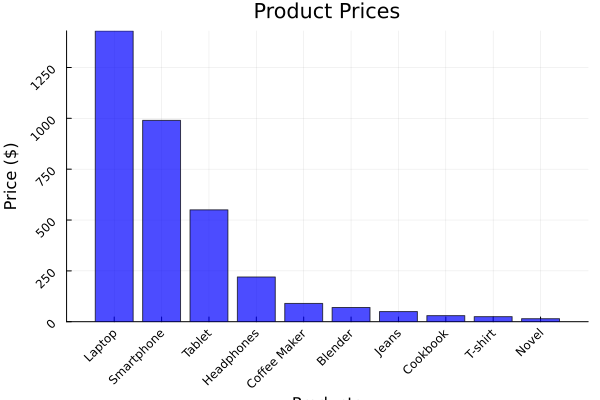

In [ ]:
p1 = bar(
    products_df.product_name, 
    products_df.price,
    title="Product Prices",
    xlabel="Products",
    ylabel="Price (\$)",
    legend=false,
    rotation=45,
    tickfont=font(8),
    color=:blue,
    alpha=0.7
)


Category data retrieved:
4×2 DataFrame
 Row │ category_name   product_count 
     │ String          Int64         
─────┼───────────────────────────────
   1 │ Books                       2
   2 │ Clothing                    2
   3 │ Electronics                 4
   4 │ Home & Kitchen              2

Creating pie chart...


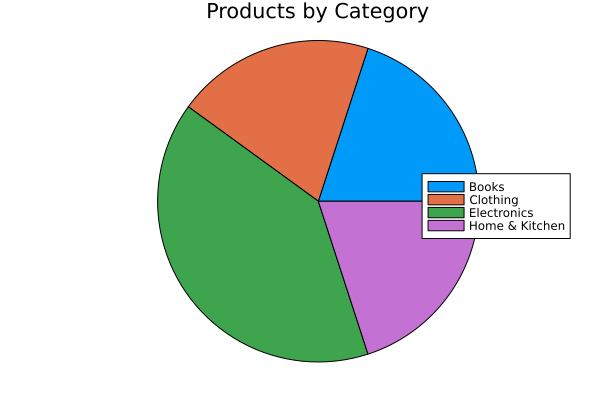

In [105]:
category_query = """
    SELECT c.category_name, COUNT(*) as product_count
    FROM products p
    JOIN product_categories c ON p.category_id = c.category_id
    GROUP BY c.category_name
"""
category_df = DBInterface.execute(db, category_query) |> DataFrame
println("Category data retrieved:")
println(category_df)

#pie chart
println("\nCreating pie chart...")
p4 = pie(
    category_df.category_name,
    category_df.product_count,
    title="Products by Category",
    legend=:right,
    autopct="%0.1f%%"
)


customer data retrieved:
5×4 DataFrame
 Row │ customer_id  full_name       age    income  
     │ Int64        String          Int64  Float64 
─────┼─────────────────────────────────────────────
   1 │           2  Jane Smith         28  65100.8
   2 │           6  Sarah Johnson      33  71000.0
   3 │           1  John Doe           36  80000.0
   4 │           5  Michael Brown      39  84460.5
   5 │           3  Robert Johnson     42  95000.0


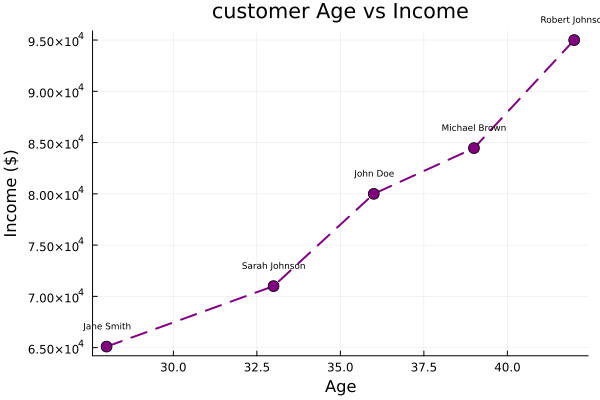

In [108]:
customer_query = """
    SELECT customer_id, first_name || ' ' || last_name as full_name, age, income
    FROM customers
    ORDER BY age
"""
customer_df = DBInterface.execute(db, customer_query) |> DataFrame
println("customer data retrieved:")
println(customer_df)

p5 = plot(
    customer_df.age,
    customer_df.income,
    title="customer Age vs Income",
    xlabel="Age",
    ylabel="Income (\$)",
    legend=false,
    marker=(:circle, 6),
    line=(:dash, 2),
    color=:purple
)

#customer names as annotations
for i in 1:nrow(customer_df)
    annotate!(
        p5,
        [(customer_df.age[i], customer_df.income[i] + 2000, text(customer_df.full_name[i], 6, :black, :center))]
    )
end

display(p5)


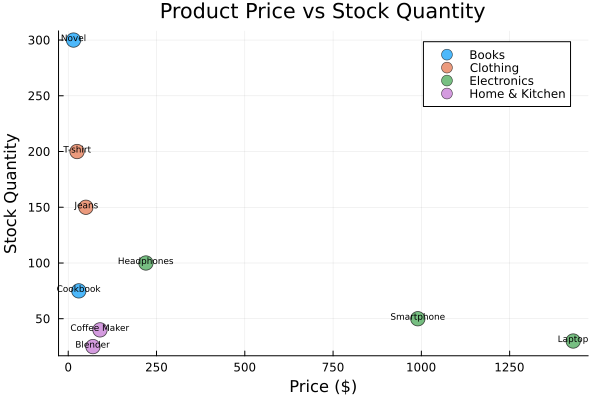

9×4 DataFrame
 Row │ product_name  price     stock_quantity  category_name  
     │ String        Float64   Int64           String         
─────┼────────────────────────────────────────────────────────
   1 │ Smartphone     989.989              50  Electronics
   2 │ Laptop        1429.99               30  Electronics
   3 │ Headphones     219.989             100  Electronics
   4 │ T-shirt         24.99              200  Clothing
   5 │ Jeans           49.99              150  Clothing
   6 │ Coffee Maker    89.99               40  Home & Kitchen
   7 │ Blender         69.99               25  Home & Kitchen
   8 │ Novel           14.99              300  Books
   9 │ Cookbook        29.99               75  Books


In [110]:
product_stock_query = """
    SELECT p.product_name, p.price, p.stock_quantity, c.category_name
    FROM products p
    JOIN product_categories c ON p.category_id = c.category_id
    WHERE p.stock_quantity > 0
"""
product_stock_df = DBInterface.execute(db, product_stock_query) |> DataFrame
println(product_stock_df)


p6 = scatter(
    product_stock_df.price,
    product_stock_df.stock_quantity,
    title="Product Price vs Stock Quantity",
    xlabel="Price (\$)",
    ylabel="Stock Quantity",
    group=product_stock_df.category_name,
    legend=:topright,
    markersize=8,
    alpha=0.7
)


for i in 1:nrow(product_stock_df)
    annotate!(
        p6,
        [(product_stock_df.price[i], product_stock_df.stock_quantity[i] + 2, text(product_stock_df.product_name[i], 6, :black, :center))]
    )
end
display(p6)

Customer age data retrieved:
5×1 DataFrame
 Row │ age   
     │ Int64 
─────┼───────
   1 │    36
   2 │    28
   3 │    42
   4 │    39
   5 │    33


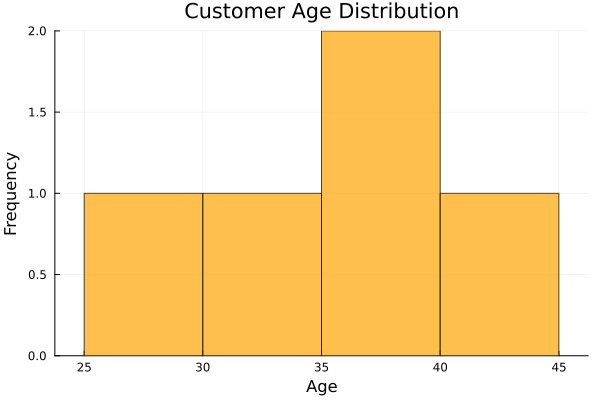

In [111]:

age_query = "SELECT age FROM customers"
age_df = DBInterface.execute(db, age_query) |> DataFrame
println("Customer age data retrieved:")
println(age_df)

p7 = histogram(
    age_df.age,
    title="Customer Age Distribution",
    xlabel="Age",
    ylabel="Frequency",
    legend=false,
    bins=5,
    color=:orange,
    alpha=0.7
)


3×3 DataFrame
 Row │ age_group    is_active  customer_count 
     │ String       Int64      Int64          
─────┼────────────────────────────────────────
   1 │ 30-39                1               3
   2 │ 40 and over          0               1
   3 │ Under 30             1               1


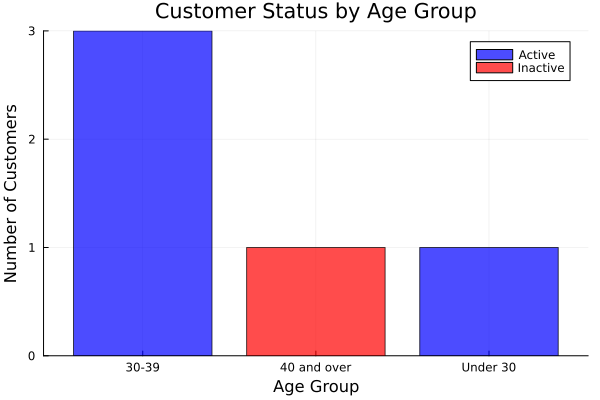

In [113]:
status_query = """
    SELECT 
        CASE 
            WHEN age < 30 THEN 'Under 30'
            WHEN age >= 30 AND age < 40 THEN '30-39'
            ELSE '40 and over'
        END as age_group,
        is_active,
        COUNT(*) as customer_count
    FROM customers
    GROUP BY age_group, is_active
    ORDER BY age_group, is_active
"""
status_df = DBInterface.execute(db, status_query) |> DataFrame

println(status_df)

age_groups = unique(status_df.age_group)
active_counts = zeros(Int, length(age_groups))
inactive_counts = zeros(Int, length(age_groups))

for i in 1:nrow(status_df)
    group_index = findfirst(g -> g == status_df.age_group[i], age_groups)
    if status_df.is_active[i] == 1
        active_counts[group_index] = status_df.customer_count[i]
    else
        inactive_counts[group_index] = status_df.customer_count[i]
    end
end

p9 = bar(
    age_groups,
    [active_counts inactive_counts],
    title="Customer Status by Age Group",
    xlabel="Age Group",
    ylabel="Number of Customers",
    label=["Active" "Inactive"],
    legend=:topright,
    color=[:blue :red],
    alpha=0.7
)

In [115]:
SQLite.execute(db, """
    CREATE TABLE IF NOT EXISTS purchase_times (
        day_of_week INTEGER,
        hour_of_day INTEGER,
        purchase_count INTEGER
    )
""")

days = 0:6  # 0 = Sunday, 6 = Saturday
hours = 8:20  # 8 AM to 8 PM
SQLite.execute(db, "DELETE FROM purchase_times")


101

In [116]:

for day in days
    for hour in hours
        # Create a pattern: more purchases on weekends and evenings
        base_count = 5
        weekend_factor = day >= 5 ? 2.0 : 1.0  # More on weekends (Fri, Sat)
        evening_factor = (hour >= 17) ? 1.5 : ((hour >= 12) ? 1.2 : 1.0)  # More in evenings
        
        count = round(Int, base_count * weekend_factor * evening_factor * (1 + 0.3 * rand()))
        
        SQLite.execute(db, """
            INSERT INTO purchase_times (day_of_week, hour_of_day, purchase_count)
            VALUES (?, ?, ?)
        """, (day, hour, count))
    end
end


In [117]:
purchase_time_query = "SELECT * FROM purchase_times ORDER BY day_of_week, hour_of_day"
purchase_time_df = DBInterface.execute(db, purchase_time_query) |> DataFrame
println("Purchase time data created:")
println(first(purchase_time_df, 10))

Purchase time data created:
10×3 DataFrame
 Row │ day_of_week  hour_of_day  purchase_count 
     │ Int64        Int64        Int64          
─────┼──────────────────────────────────────────
   1 │           0            8               6
   2 │           0            9               6
   3 │           0           10               5
   4 │           0           11               6
   5 │           0           12               6
   6 │           0           13               7
   7 │           0           14               6
   8 │           0           15               6
   9 │           0           16               7
  10 │           0           17              10


In [118]:
days_labels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
hours_labels = string.(hours) .* ":00"



13-element Vector{String}:
 "8:00"
 "9:00"
 "10:00"
 "11:00"
 "12:00"
 "13:00"
 "14:00"
 "15:00"
 "16:00"
 "17:00"
 "18:00"
 "19:00"
 "20:00"

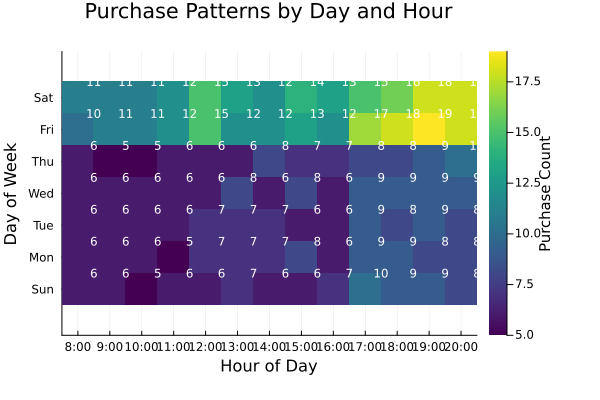

In [119]:
heatmap_data = zeros(length(days), length(hours))
for i in 1:nrow(purchase_time_df)
    day_idx = purchase_time_df.day_of_week[i] + 1  # 0-based to 1-based
    hour_idx = findfirst(h -> h == purchase_time_df.hour_of_day[i], hours)
    heatmap_data[day_idx, hour_idx] = purchase_time_df.purchase_count[i]
end

p10 = heatmap(
    hours_labels,
    days_labels,
    heatmap_data,
    title="Purchase Patterns by Day and Hour",
    xlabel="Hour of Day",
    ylabel="Day of Week",
    color=:viridis,
    aspect_ratio=:equal,
    right_margin=10Plots.mm
)

for i in 1:length(days), j in 1:length(hours)
    annotate!(
        p10,
        [(j, i, text(string(Int(heatmap_data[i, j])), 8, :white, :center))]
    )
end

plot!(p10, colorbar_title="Purchase Count")

In [121]:
SQLite.execute(db, """
    CREATE TABLE IF NOT EXISTS monthly_purchases (
        month_date DATE,
        total_sales REAL,
        num_transactions INTEGER
    )
""")

101

Monthly purchase data created:
12×3 DataFrame
 Row │ month_date  total_sales  num_transactions 
     │ Date        Float64      Int64            
─────┼───────────────────────────────────────────
   1 │ 2023-03-01      6595.04               131
   2 │ 2022-07-01      7055.46               131
   3 │ 2023-04-01      5500.42               114
   4 │ 2022-08-01      6167.01               134
   5 │ 2023-05-01      6862.57               136
   6 │ 2022-09-01      5401.29               108
   7 │ 2023-06-01      7919.98               154
   8 │ 2022-10-01      5605.93               109
   9 │ 2022-11-01      4683.58               100
  10 │ 2022-12-01     10034.6                208
  11 │ 2023-01-01      3989.76                78
  12 │ 2023-02-01      4545.08                88


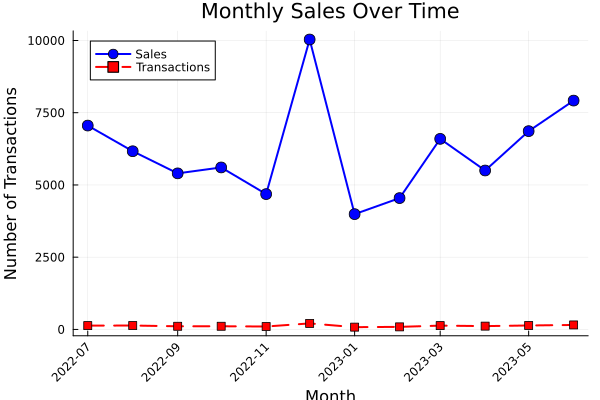

In [127]:

SQLite.execute(db, "DELETE FROM monthly_purchases")

current_date = Date(2023, 6, 1)
for i in 0:11
    month_date = current_date - Month(i)
    

    month_num = month(month_date)
    base_sales = 5000.0
    
    # Dec peak
    if month_num == 12
        seasonal_factor = 1.8
    # summer increase (June-August)
    elseif month_num >= 6 && month_num <= 8
        seasonal_factor = 1.4
    #spring (March-May)
    elseif month_num >= 3 && month_num <= 5
        seasonal_factor = 1.2
    #fall (September-November)
    elseif month_num >= 9 && month_num <= 11
        seasonal_factor = 1.1
    # 2inter low (January-February)
    else
        seasonal_factor = 0.9
    end
    
    #some randomness/jitter
    random_factor = 1.0 + 0.1 * randn()
    
    total_sales = base_sales * seasonal_factor * random_factor
    num_transactions = round(Int, total_sales / 50 * (1 + 0.05 * randn()))
    
    SQLite.execute(db, """
        INSERT INTO monthly_purchases (month_date, total_sales, num_transactions)
        VALUES (?, ?, ?)
    """, (month_date, total_sales, num_transactions))
end

# find the monthly purchase data
monthly_query = "SELECT * FROM monthly_purchases ORDER BY month_date"
monthly_df = DBInterface.execute(db, monthly_query) |> DataFrame
println("Monthly purchase data created:")
println(monthly_df)

# Convert month_date to proper Date objects
monthly_df.month_date = Date.(monthly_df.month_date)

sort!(monthly_df, :month_date)

p11 = plot(
    monthly_df.month_date,
    monthly_df.total_sales,
    title="Monthly Sales Over Time",
    xlabel="Month",
    ylabel="Total Sales (\$)",
    label="Sales",
    marker=(:circle, 6),
    line=(:solid, 2),
    color=:blue,
    legend=:topleft
)

plot!(
    p11,
    monthly_df.month_date,
    monthly_df.num_transactions,
    ylabel="Number of Transactions",
    label="Transactions",
    marker=(:square, 4),
    line=(:dash, 2),
    color=:red
)

xticks = monthly_df.month_date[1:2:end] 
xtick_labels = Dates.format.(xticks, "yyyy-mm")
plot!(p11, xticks=(xticks, xtick_labels), xrotation=45)


In [ ]:
SQLite.execute(db, """
    CREATE TABLE IF NOT EXISTS customer_purchases_3d (
        customer_id INTEGER,
        age INTEGER,
        income REAL,
        total_purchase REAL
    )
""")

SQLite.execute(db, "DELETE FROM customer_purchases_3d")



In [128]:
customer_data_query = "SELECT customer_id, age, income FROM customers"
customer_data_df = DBInterface.execute(db, customer_data_query) |> DataFrame

for i in 1:nrow(customer_data_df)
    customer_id = customer_data_df.customer_id[i]
    age = customer_data_df.age[i]
    income = customer_data_df.income[i]
    

    base_purchase = 500.0
    age_factor = 1.0 + (age - 30) * 0.02 
    income_factor = income / 50000.0  
    random_factor = 1.0 + 0.2 * randn()
    
    total_purchase = base_purchase * age_factor * income_factor * random_factor
    
    SQLite.execute(db, """
        INSERT INTO customer_purchases_3d (customer_id, age, income, total_purchase)
        VALUES (?, ?, ?, ?)
    """, (customer_id, age, income, total_purchase))
end

data_3d_query = "SELECT * FROM customer_purchases_3d"
data_3d_df = DBInterface.execute(db, data_3d_query) |> DataFrame

println(data_3d_df)

p12 = scatter3d(
    data_3d_df.age,
    data_3d_df.income,
    data_3d_df.total_purchase,
    title="Customer Age, Income, and Purchase Amount",
    xlabel="Age",
    ylabel="Income ($)",
    zlabel="Total Purchase ($)",
    marker=(:circle, 8),
    color=:rainbow,
    alpha=0.7,
    legend=false
)


SQLiteException: SQLiteException("no such table: customer_purchases_3d")

In [129]:
customers_df = DBInterface.execute(db, "SELECT * FROM customers LIMIT 3") |> DataFrame
println(customers_df)

3×10 DataFrame
 Row │ customer_id  first_name  last_name  email                   age    income   is_active  registration_date  last_purchase_timestamp  notes                        
     │ Int64        String      String     String                  Int64  Float64  Int64      String             String                   String                       
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           1  John        Doe        john.doe@example.com       36  80000.0          1  2023-01-15         2023-06-28 09:30:00      Customer information updated
   2 │           2  Jane        Smith      jane.smith@example.com     28  65100.8          1  2023-02-10         2023-06-18 09:15:30      Prefers email contact
   3 │           3  Robert      Johnson    robert.j@example.com       42  95000.0          0  2023-01-05         2023-06-15 16:45:20      VIP customer


In [130]:
products_df = DBInterface.execute(db, "SELECT * FROM products LIMIT 3") |> DataFrame
println(products_df)

3×7 DataFrame
 Row │ product_id  product_name  category_id  price     stock_quantity  is_available  created_at          
     │ Int64       String        Int64        Float64   Int64           Int64         String              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │          1  Smartphone              1   989.989              50             1  2025-04-07 03:25:34
   2 │          2  Laptop                  1  1429.99               30             1  2025-04-07 03:25:34
   3 │          3  Headphones              1   219.989             100             1  2025-04-07 03:25:34


In [131]:
categories_df = DBInterface.execute(db, "SELECT * FROM product_categories") |> DataFrame
println(categories_df)

4×4 DataFrame
 Row │ category_id  category_name   description                        created_at          
     │ Int64        String          String                             String              
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │           1  Electronics     Electronic devices and accessori…  2025-04-07 03:25:15
   2 │           2  Clothing        Apparel and fashion items          2025-04-07 03:25:15
   3 │           3  Home & Kitchen  Household and kitchen products     2025-04-07 03:25:15
   4 │           4  Books           Books, e-books, and publications   2025-04-07 03:25:15


In [132]:
purchases_df = DBInterface.execute(db, "SELECT * FROM purchases LIMIT 3") |> DataFrame
println(purchases_df)

3×6 DataFrame
 Row │ purchase_id  customer_id  product_id  purchase_date        quantity  total_price 
     │ Int64        Int64        Int64       String               Int64     Float64     
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │           1            1           1  2023-06-20 14:30:45         1       899.99
   2 │           2            1           7  2023-05-15 10:20:30         1        69.99
   3 │           3            2           4  2023-06-18 09:15:30         2        49.98


In [133]:
inner_join_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    INNER JOIN 
        product_categories c ON p.category_id = c.category_id
    ORDER BY 
        p.product_id
"""
inner_join_df = DBInterface.execute(db, inner_join_query) |> DataFrame

Row,product_id,product_name,price,category_name
,Int64,String,Float64,String
1,1,Smartphone,989.989,Electronics
2,2,Laptop,1429.99,Electronics
3,3,Headphones,219.989,Electronics
4,4,T-shirt,24.99,Clothing
5,5,Jeans,49.99,Clothing
6,6,Coffee Maker,89.99,Home & Kitchen
7,7,Blender,69.99,Home & Kitchen
8,8,Novel,14.99,Books
9,9,Cookbook,29.99,Books


In [134]:
inner_join_filter_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    INNER JOIN 
        product_categories c ON p.category_id = c.category_id
    WHERE 
        p.price > 100
    ORDER BY 
        p.price DESC
"""
inner_join_filter_df = DBInterface.execute(db, inner_join_filter_query) |> DataFrame

println(inner_join_filter_df)

4×4 DataFrame
 Row │ product_id  product_name  price     category_name 
     │ Int64       String        Float64   String        
─────┼───────────────────────────────────────────────────
   1 │          2  Laptop        1429.99   Electronics
   2 │          1  Smartphone     989.989  Electronics
   3 │         10  Tablet         549.989  Electronics
   4 │          3  Headphones     219.989  Electronics


In [135]:
inner_join_agg_query = """
    SELECT 
        c.category_name,
        COUNT(p.product_id) AS product_count,
        AVG(p.price) AS average_price,
        SUM(p.stock_quantity) AS total_stock
    FROM 
        products p
    INNER JOIN 
        product_categories c ON p.category_id = c.category_id
    GROUP BY 
        c.category_name
    ORDER BY 
        product_count DESC
"""
inner_join_agg_df = DBInterface.execute(db, inner_join_agg_query) |> DataFrame

println(inner_join_agg_df)

4×4 DataFrame
 Row │ category_name   product_count  average_price  total_stock 
     │ String          Int64          Float64        Int64       
─────┼───────────────────────────────────────────────────────────
   1 │ Electronics                 4        797.489          180
   2 │ Home & Kitchen              2         79.99            65
   3 │ Clothing                    2         37.49           350
   4 │ Books                       2         22.49           375


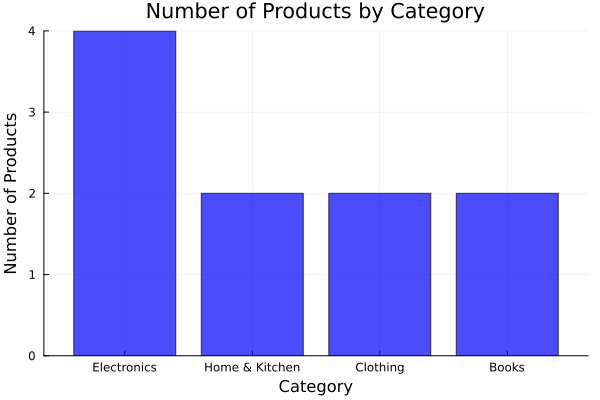

In [136]:
p1 = bar(
    inner_join_agg_df.category_name,
    inner_join_agg_df.product_count,
    title="Number of Products by Category",
    xlabel="Category",
    ylabel="Number of Products",
    legend=false,
    color=:blue,
    alpha=0.7
)

In [137]:
customer_purchases_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        COUNT(p.purchase_id) AS purchase_count,
        SUM(p.total_price) AS total_spent
    FROM 
        customers c
    INNER JOIN 
        purchases p ON c.customer_id = p.customer_id
    GROUP BY 
        c.customer_id
    ORDER BY 
        total_spent DESC
"""
customer_purchases_df = DBInterface.execute(db, customer_purchases_query) |> DataFrame

println(customer_purchases_df)


5×4 DataFrame
 Row │ customer_id  customer_name   purchase_count  total_spent 
     │ Int64        String          Int64           Float64     
─────┼──────────────────────────────────────────────────────────
   1 │           3  Robert Johnson               2     1344.96
   2 │           5  Michael Brown                3     1189.97
   3 │           1  John Doe                     2      969.98
   4 │           6  Sarah Johnson                1      219.989
   5 │           2  Jane Smith                   2       79.97


In [138]:

left_join_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    LEFT JOIN 
        product_categories c ON p.category_id = c.category_id
    ORDER BY 
        p.product_id
"""
left_join_df = DBInterface.execute(db, left_join_query) |> DataFrame

println(left_join_df)

10×4 DataFrame
 Row │ product_id  product_name  price     category_name  
     │ Int64       String        Float64   String         
─────┼────────────────────────────────────────────────────
   1 │          1  Smartphone     989.989  Electronics
   2 │          2  Laptop        1429.99   Electronics
   3 │          3  Headphones     219.989  Electronics
   4 │          4  T-shirt         24.99   Clothing
   5 │          5  Jeans           49.99   Clothing
   6 │          6  Coffee Maker    89.99   Home & Kitchen
   7 │          7  Blender         69.99   Home & Kitchen
   8 │          8  Novel           14.99   Books
   9 │          9  Cookbook        29.99   Books
  10 │         10  Tablet         549.989  Electronics


In [139]:
SQLite.execute(db, """
    INSERT INTO products 
    (product_name, category_id, price, stock_quantity, is_available)
    VALUES 
    ('Uncategorized Product', NULL, 45.99, 10, 1)
""")

left_join_null_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    LEFT JOIN 
        product_categories c ON p.category_id = c.category_id
    ORDER BY 
        c.category_name NULLS LAST
"""
left_join_null_df = DBInterface.execute(db, left_join_null_query) |> DataFrame

println(left_join_null_df)

11×4 DataFrame
 Row │ product_id  product_name           price     category_name  
     │ Int64       String                 Float64   String?        
─────┼─────────────────────────────────────────────────────────────
   1 │          8  Novel                    14.99   Books
   2 │          9  Cookbook                 29.99   Books
   3 │          4  T-shirt                  24.99   Clothing
   4 │          5  Jeans                    49.99   Clothing
   5 │          1  Smartphone              989.989  Electronics
   6 │          2  Laptop                 1429.99   Electronics
   7 │          3  Headphones              219.989  Electronics
   8 │         10  Tablet                  549.989  Electronics
   9 │          6  Coffee Maker             89.99   Home & Kitchen
  10 │          7  Blender                  69.99   Home & Kitchen
  11 │         11  Uncategorized Product    45.99   missing        


In [140]:

left_join_where_filter_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    LEFT JOIN 
        product_categories c ON p.category_id = c.category_id
    WHERE 
        c.category_name = 'Electronics'
    ORDER BY 
        p.price DESC
"""
left_join_where_filter_df = DBInterface.execute(db, left_join_where_filter_query) |> DataFrame

println(left_join_where_filter_df)

4×4 DataFrame
 Row │ product_id  product_name  price     category_name 
     │ Int64       String        Float64   String        
─────┼───────────────────────────────────────────────────
   1 │          2  Laptop        1429.99   Electronics
   2 │          1  Smartphone     989.989  Electronics
   3 │         10  Tablet         549.989  Electronics
   4 │          3  Headphones     219.989  Electronics


In [141]:
left_join_on_filter_query = """
    SELECT 
        p.product_id,
        p.product_name,
        p.price,
        c.category_name
    FROM 
        products p
    LEFT JOIN 
        product_categories c ON p.category_id = c.category_id AND c.category_name = 'Electronics'
    ORDER BY 
        p.product_id
"""
left_join_on_filter_df = DBInterface.execute(db, left_join_on_filter_query) |> DataFrame

println(left_join_on_filter_df)

11×4 DataFrame
 Row │ product_id  product_name           price     category_name 
     │ Int64       String                 Float64   String?       
─────┼────────────────────────────────────────────────────────────
   1 │          1  Smartphone              989.989  Electronics
   2 │          2  Laptop                 1429.99   Electronics
   3 │          3  Headphones              219.989  Electronics
   4 │          4  T-shirt                  24.99   missing       
   5 │          5  Jeans                    49.99   missing       
   6 │          6  Coffee Maker             89.99   missing       
   7 │          7  Blender                  69.99   missing       
   8 │          8  Novel                    14.99   missing       
   9 │          9  Cookbook                 29.99   missing       
  10 │         10  Tablet                  549.989  Electronics
  11 │         11  Uncategorized Product    45.99   missing       


In [142]:
customers_no_purchases_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        p.purchase_id
    FROM 
        customers c
    LEFT JOIN 
        purchases p ON c.customer_id = p.customer_id
    WHERE 
        p.purchase_id IS NULL
"""
customers_no_purchases_df = DBInterface.execute(db, customers_no_purchases_query) |> DataFrame

println(customers_no_purchases_df)

0×3 DataFrame
 Row │ customer_id  customer_name  purchase_id 
     │ Int64?       Missing        Int64?      
─────┴─────────────────────────────────────────


In [143]:
right_join_simulation_query = """
    SELECT 
        p.product_id,
        p.product_name,
        c.category_id,
        c.category_name
    FROM 
        product_categories c
    LEFT JOIN 
        products p ON c.category_id = p.category_id
    ORDER BY 
        c.category_id, p.product_id
"""
right_join_simulation_df = DBInterface.execute(db, right_join_simulation_query) |> DataFrame

println(right_join_simulation_df)

10×4 DataFrame
 Row │ product_id  product_name  category_id  category_name  
     │ Int64       String        Int64        String         
─────┼───────────────────────────────────────────────────────
   1 │          1  Smartphone              1  Electronics
   2 │          2  Laptop                  1  Electronics
   3 │          3  Headphones              1  Electronics
   4 │         10  Tablet                  1  Electronics
   5 │          4  T-shirt                 2  Clothing
   6 │          5  Jeans                   2  Clothing
   7 │          6  Coffee Maker            3  Home & Kitchen
   8 │          7  Blender                 3  Home & Kitchen
   9 │          8  Novel                   4  Books
  10 │          9  Cookbook                4  Books


In [144]:
categories_no_products_query = """
    SELECT 
        c.category_id,
        c.category_name
    FROM 
        product_categories c
    LEFT JOIN 
        products p ON c.category_id = p.category_id
    WHERE 
        p.product_id IS NULL
"""
categories_no_products_df = DBInterface.execute(db, categories_no_products_query) |> DataFrame

println(categories_no_products_df)


0×2 DataFrame
 Row │ category_id  category_name 
     │ Int64?       String?       
─────┴────────────────────────────


In [145]:
if nrow(categories_no_products_df) == 0
    println("Adding a category without products...")
    SQLite.execute(db, """
        INSERT INTO product_categories 
        (category_name, description)
        VALUES 
        ('Toys', 'Children toys and games')
    """)
    

    categories_no_products_df = DBInterface.execute(db, categories_no_products_query) |> DataFrame

    println(categories_no_products_df)
end

Adding a category without products...
1×2 DataFrame
 Row │ category_id  category_name 
     │ Int64        String        
─────┼────────────────────────────
   1 │           5  Toys


In [147]:

category_product_count_query = """
    SELECT 
        c.category_name,
        COUNT(p.product_id) AS product_count
    FROM 
        product_categories c
    LEFT JOIN 
        products p ON c.category_id = p.category_id
    GROUP BY 
        c.category_name
    ORDER BY 
        product_count DESC
"""
category_product_count_df = DBInterface.execute(db, category_product_count_query) |> DataFrame

println(category_product_count_df)

5×2 DataFrame
 Row │ category_name   product_count 
     │ String          Int64         
─────┼───────────────────────────────
   1 │ Electronics                 4
   2 │ Books                       2
   3 │ Clothing                    2
   4 │ Home & Kitchen              2
   5 │ Toys                        0


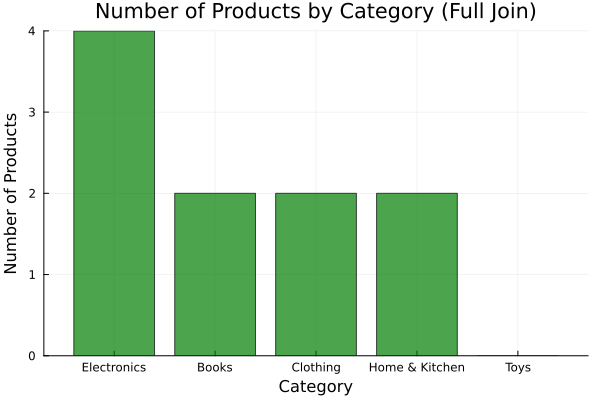

In [148]:
p2 = bar(
    category_product_count_df.category_name,
    category_product_count_df.product_count,
    title="Number of Products by Category (Full Join)",
    xlabel="Category",
    ylabel="Number of Products",
    legend=false,
    color=:green,
    alpha=0.7
)

In [149]:

SQLite.execute(db, "DROP TABLE IF EXISTS colors")
SQLite.execute(db, "DROP TABLE IF EXISTS sizes")

SQLite.execute(db, """
    CREATE TABLE colors (
        color_id INTEGER PRIMARY KEY,
        color_name TEXT
    )
""")

SQLite.execute(db, """
    CREATE TABLE sizes (
        size_id INTEGER PRIMARY KEY,
        size_name TEXT
    )
""")


101

In [150]:

colors_data = [
    (1, "Red"),
    (2, "Blue"),
    (3, "Green")
]

sizes_data = [
    (1, "Small"),
    (2, "Medium"),
    (3, "Large")
]

for color in colors_data
    SQLite.execute(db, "INSERT INTO colors VALUES (?, ?)", color)
end

for size in sizes_data
    SQLite.execute(db, "INSERT INTO sizes VALUES (?, ?)", size)
end


In [151]:
cross_join_query = """
    SELECT 
        c.color_name,
        s.size_name,
        c.color_name || ' ' || s.size_name AS combination
    FROM 
        colors c
    CROSS JOIN 
        sizes s
"""
cross_join_df = DBInterface.execute(db, cross_join_query) |> DataFrame

println(cross_join_df)


9×3 DataFrame
 Row │ color_name  size_name  combination  
     │ String      String     String       
─────┼─────────────────────────────────────
   1 │ Red         Small      Red Small
   2 │ Red         Medium     Red Medium
   3 │ Red         Large      Red Large
   4 │ Blue        Small      Blue Small
   5 │ Blue        Medium     Blue Medium
   6 │ Blue        Large      Blue Large
   7 │ Green       Small      Green Small
   8 │ Green       Medium     Green Medium
   9 │ Green       Large      Green Large


In [152]:

product_variants_query = """
    SELECT 
        'T-shirt' AS base_product,
        c.color_name,
        s.size_name,
        'T-shirt - ' || c.color_name || ' (' || s.size_name || ')' AS product_variant,
        CASE 
            WHEN s.size_name = 'Small' THEN 19.99
            WHEN s.size_name = 'Medium' THEN 24.99
            WHEN s.size_name = 'Large' THEN 29.99
        END AS price
    FROM 
        colors c
    CROSS JOIN 
        sizes s
"""
product_variants_df = DBInterface.execute(db, product_variants_query) |> DataFrame

println(product_variants_df)

9×5 DataFrame
 Row │ base_product  color_name  size_name  product_variant           price   
     │ String        String      String     String                    Float64 
─────┼────────────────────────────────────────────────────────────────────────
   1 │ T-shirt       Red         Small      T-shirt - Red (Small)       19.99
   2 │ T-shirt       Red         Medium     T-shirt - Red (Medium)      24.99
   3 │ T-shirt       Red         Large      T-shirt - Red (Large)       29.99
   4 │ T-shirt       Blue        Small      T-shirt - Blue (Small)      19.99
   5 │ T-shirt       Blue        Medium     T-shirt - Blue (Medium)     24.99
   6 │ T-shirt       Blue        Large      T-shirt - Blue (Large)      29.99
   7 │ T-shirt       Green       Small      T-shirt - Green (Small)     19.99
   8 │ T-shirt       Green       Medium     T-shirt - Green (Medium)    24.99
   9 │ T-shirt       Green       Large      T-shirt - Green (Large)     29.99


In [154]:

SQLite.execute(db, "DROP TABLE IF EXISTS employees")

SQLite.execute(db, """
    CREATE TABLE employees (
        employee_id INTEGER PRIMARY KEY,
        name TEXT,
        position TEXT,
        manager_id INTEGER,
        FOREIGN KEY (manager_id) REFERENCES employees(employee_id)
    )
""")


101

In [155]:
employees_data = [
    (1, "John Smith", "CEO", NULL),
    (2, "Sarah Johnson", "CTO", 1),
    (3, "Michael Brown", "CFO", 1),
    (4, "Emily Davis", "Engineering Manager", 2),
    (5, "Robert Wilson", "Marketing Manager", 3),
    (6, "Jennifer Lee", "Senior Developer", 4),
    (7, "David Miller", "Developer", 6),
    (8, "Lisa Anderson", "Developer", 6),
    (9, "James Taylor", "Marketing Specialist", 5)
]

for employee in employees_data
    SQLite.execute(db, "INSERT INTO employees VALUES (?, ?, ?, ?)", employee)
end

UndefVarError: UndefVarError: `NULL` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [156]:

employee_manager_query = """
    SELECT 
        e.employee_id,
        e.name AS employee_name,
        e.position AS employee_position,
        m.name AS manager_name,
        m.position AS manager_position
    FROM 
        employees e
    LEFT JOIN 
        employees m ON e.manager_id = m.employee_id
    ORDER BY 
        e.employee_id
"""
employee_manager_df = DBInterface.execute(db, employee_manager_query) |> DataFrame
println(employee_manager_df)


0×5 DataFrame
 Row │ employee_id  employee_name  employee_position  manager_name  manager_position 
     │ Int64?       String?        String?            String?       String?          
─────┴───────────────────────────────────────────────────────────────────────────────


In [157]:
team_members_query = """
    SELECT 
        m.name AS manager_name,
        e.name AS employee_name,
        e.position AS employee_position
    FROM 
        employees e
    JOIN 
        employees m ON e.manager_id = m.employee_id
    WHERE 
        m.name = 'Jennifer Lee'
    ORDER BY 
        e.name
"""
team_members_df = DBInterface.execute(db, team_members_query) |> DataFrame

println(team_members_df)


0×3 DataFrame
 Row │ manager_name  employee_name  employee_position 
     │ String?       String?        String?           
─────┴────────────────────────────────────────────────


In [158]:
SQLite.execute(db, "DROP TABLE IF EXISTS departments")
SQLite.execute(db, "DROP TABLE IF EXISTS dept_employees")

SQLite.execute(db, """
    CREATE TABLE departments (
        dept_id INTEGER PRIMARY KEY,
        dept_name TEXT
    )
""")

SQLite.execute(db, """
    CREATE TABLE dept_employees (
        employee_id INTEGER PRIMARY KEY,
        employee_name TEXT,
        dept_id INTEGER
    )
""")


101

In [159]:
departments_data = [
    (1, "Engineering"),
    (2, "Marketing"),
    (3, "Finance"),
    (4, "Human Resources")
]

dept_employees_data = [
    (1, "Alice Johnson", 1),
    (2, "Bob Smith", 1),
    (3, "Charlie Brown", 2),
    (4, "Diana Miller", 3),
    (5, "Edward Davis", 1),
    (6, "Fiona Wilson", 2),
    (7, "George Taylor", 4)
]

for dept in departments_data
    SQLite.execute(db, "INSERT INTO departments VALUES (?, ?)", dept)
end

for emp in dept_employees_data
    SQLite.execute(db, "INSERT INTO dept_employees VALUES (?, ?, ?)", emp)
end


In [160]:
natural_join_query = """
    SELECT 
        e.employee_id,
        e.employee_name,
        d.dept_name
    FROM 
        dept_employees e
    NATURAL JOIN 
        departments d
    ORDER BY 
        e.employee_id
"""
natural_join_df = DBInterface.execute(db, natural_join_query) |> DataFrame

println(natural_join_df)

7×3 DataFrame
 Row │ employee_id  employee_name  dept_name       
     │ Int64        String         String          
─────┼─────────────────────────────────────────────
   1 │           1  Alice Johnson  Engineering
   2 │           2  Bob Smith      Engineering
   3 │           3  Charlie Brown  Marketing
   4 │           4  Diana Miller   Finance
   5 │           5  Edward Davis   Engineering
   6 │           6  Fiona Wilson   Marketing
   7 │           7  George Taylor  Human Resources


In [161]:
explicit_join_query = """
    SELECT 
        e.employee_id,
        e.employee_name,
        d.dept_name
    FROM 
        dept_employees e
    INNER JOIN 
        departments d ON e.dept_id = d.dept_id
    ORDER BY 
        e.employee_id
"""
explicit_join_df = DBInterface.execute(db, explicit_join_query) |> DataFrame

println(explicit_join_df)


7×3 DataFrame
 Row │ employee_id  employee_name  dept_name       
     │ Int64        String         String          
─────┼─────────────────────────────────────────────
   1 │           1  Alice Johnson  Engineering
   2 │           2  Bob Smith      Engineering
   3 │           3  Charlie Brown  Marketing
   4 │           4  Diana Miller   Finance
   5 │           5  Edward Davis   Engineering
   6 │           6  Fiona Wilson   Marketing
   7 │           7  George Taylor  Human Resources


In [162]:
customers_df = DBInterface.execute(db, "SELECT * FROM customers LIMIT 2") |> DataFrame

Row,customer_id,first_name,last_name,email,age,income,is_active,registration_date,last_purchase_timestamp,notes
,Int64,String,String,String,Int64,Float64,Int64,String,String,String
1,1,John,Doe,john.doe@example.com,36,80000.0,1,2023-01-15,2023-06-28 09:30:00,Customer information updated
2,2,Jane,Smith,jane.smith@example.com,28,65100.8,1,2023-02-10,2023-06-18 09:15:30,Prefers email contact


In [163]:
products_df = DBInterface.execute(db, "SELECT * FROM products LIMIT 2") |> DataFrame

Row,product_id,product_name,category_id,price,stock_quantity,is_available,created_at
,Int64,String,Int64,Float64,Int64,Int64,String
1,1,Smartphone,1,989.989,50,1,2025-04-07 03:25:34
2,2,Laptop,1,1429.99,30,1,2025-04-07 03:25:34


In [164]:
categories_df = DBInterface.execute(db, "SELECT * FROM product_categories LIMIT 2") |> DataFrame

Row,category_id,category_name,description,created_at
,Int64,String,String,String
1,1,Electronics,Electronic devices and accessories,2025-04-07 03:25:15
2,2,Clothing,Apparel and fashion items,2025-04-07 03:25:15


In [165]:
purchases_df = DBInterface.execute(db, "SELECT * FROM purchases LIMIT 2") |> DataFrame

Row,purchase_id,customer_id,product_id,purchase_date,quantity,total_price
,Int64,Int64,Int64,String,Int64,Float64
1,1,1,1,2023-06-20 14:30:45,1,899.99
2,2,1,7,2023-05-15 10:20:30,1,69.99


In [166]:

three_table_join_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        p.purchase_id,
        p.purchase_date,
        pr.product_name,
        pr.price,
        p.quantity,
        p.total_price
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    ORDER BY 
        p.purchase_date DESC
    LIMIT 10
"""
three_table_join_df = DBInterface.execute(db, three_table_join_query) |> DataFrame

Row,customer_id,customer_name,purchase_id,purchase_date,product_name,price,quantity,total_price
,Int64,String,Int64,String,String,Float64,Int64,Float64
1,6,Sarah Johnson,11,2023-06-25 10:15:30,Headphones,219.989,1,219.989
2,1,John Doe,1,2023-06-20 14:30:45,Smartphone,989.989,1,899.99
3,5,Michael Brown,8,2023-06-19 13:20:10,Headphones,219.989,1,199.99
4,2,Jane Smith,3,2023-06-18 09:15:30,T-shirt,24.99,2,49.98
5,5,Michael Brown,9,2023-06-15 15:45:30,Coffee Maker,89.99,1,89.99
6,2,Jane Smith,4,2023-06-10 16:45:20,Cookbook,29.99,1,29.99
7,5,Michael Brown,10,2023-06-01 09:30:15,Smartphone,989.989,1,899.99
8,1,John Doe,2,2023-05-15 10:20:30,Blender,69.99,1,69.99
9,3,Robert Johnson,5,2023-05-05 11:30:15,Laptop,1429.99,1,1299.99


In [167]:
three_table_agg_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        COUNT(p.purchase_id) AS purchase_count,
        SUM(p.quantity) AS total_items_purchased,
        SUM(p.total_price) AS total_spent,
        MAX(p.purchase_date) AS latest_purchase_date
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    GROUP BY 
        c.customer_id
    ORDER BY 
        total_spent DESC
"""
three_table_agg_df = DBInterface.execute(db, three_table_agg_query) |> DataFrame

Row,customer_id,customer_name,purchase_count,total_items_purchased,total_spent,latest_purchase_date
,Int64,String,Int64,Int64,Float64,String
1,3,Robert Johnson,2,4,1344.96,2023-05-05 11:30:15
2,5,Michael Brown,3,3,1189.97,2023-06-19 13:20:10
3,1,John Doe,2,2,969.98,2023-06-20 14:30:45
4,6,Sarah Johnson,1,1,219.989,2023-06-25 10:15:30
5,2,Jane Smith,2,3,79.97,2023-06-18 09:15:30


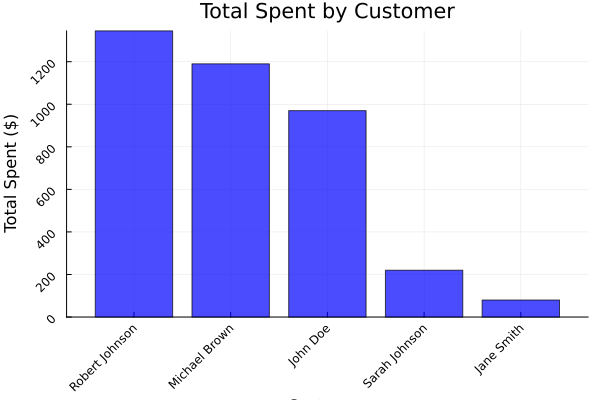

In [168]:
p1 = bar(
    three_table_agg_df.customer_name,
    three_table_agg_df.total_spent,
    title="Total Spent by Customer",
    xlabel="Customer",
    ylabel="Total Spent (\$)",
    legend=false,
    color=:blue,
    alpha=0.7,
    rotation=45,
    tickfont=font(8)
)

In [169]:
three_table_filter_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        p.purchase_date,
        pr.product_name,
        pr.price,
        p.quantity,
        p.total_price
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    WHERE 
        pr.price > 100 AND c.age < 40
    ORDER BY 
        p.purchase_date DESC
"""
three_table_filter_df = DBInterface.execute(db, three_table_filter_query) |> DataFrame

Row,customer_id,customer_name,purchase_date,product_name,price,quantity,total_price
,Int64,String,String,String,Float64,Int64,Float64
1,6,Sarah Johnson,2023-06-25 10:15:30,Headphones,219.989,1,219.989
2,1,John Doe,2023-06-20 14:30:45,Smartphone,989.989,1,899.99
3,5,Michael Brown,2023-06-19 13:20:10,Headphones,219.989,1,199.99
4,5,Michael Brown,2023-06-01 09:30:15,Smartphone,989.989,1,899.99


In [170]:
mixed_join_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        p.purchase_id,
        p.purchase_date,
        pr.product_name,
        pr.price
    FROM 
        customers c
    LEFT JOIN 
        purchases p ON c.customer_id = p.customer_id
    LEFT JOIN 
        products pr ON p.product_id = pr.product_id
    ORDER BY 
        c.customer_id, p.purchase_date DESC
"""
mixed_join_df = DBInterface.execute(db, mixed_join_query) |> DataFrame

Row,customer_id,customer_name,purchase_id,purchase_date,product_name,price
,Int64,String,Int64,String,String,Float64
1,1,John Doe,1,2023-06-20 14:30:45,Smartphone,989.989
2,1,John Doe,2,2023-05-15 10:20:30,Blender,69.99
3,2,Jane Smith,3,2023-06-18 09:15:30,T-shirt,24.99
4,2,Jane Smith,4,2023-06-10 16:45:20,Cookbook,29.99
5,3,Robert Johnson,5,2023-05-05 11:30:15,Laptop,1429.99
6,3,Robert Johnson,6,2023-04-20 13:10:45,Novel,14.99
7,5,Michael Brown,8,2023-06-19 13:20:10,Headphones,219.989
8,5,Michael Brown,9,2023-06-15 15:45:30,Coffee Maker,89.99
9,5,Michael Brown,10,2023-06-01 09:30:15,Smartphone,989.989


In [171]:

category_join_query = """
    SELECT 
        pr.product_id,
        pr.product_name,
        c.category_name,
        COUNT(p.purchase_id) AS times_purchased,
        SUM(p.quantity) AS total_quantity_sold
    FROM 
        products pr
    JOIN 
        product_categories c ON pr.category_id = c.category_id
    LEFT JOIN 
        purchases p ON pr.product_id = p.product_id
    GROUP BY 
        pr.product_id
    ORDER BY 
        total_quantity_sold DESC NULLS LAST
"""

category_join_df = DBInterface.execute(db, category_join_query) |> DataFrame

Row,product_id,product_name,category_name,times_purchased,total_quantity_sold
,Int64,String,String,Int64,Int64?
1,8,Novel,Books,1,3
2,1,Smartphone,Electronics,2,2
3,3,Headphones,Electronics,2,2
4,4,T-shirt,Clothing,1,2
5,2,Laptop,Electronics,1,1
6,5,Jeans,Clothing,1,1
7,6,Coffee Maker,Home & Kitchen,1,1
8,7,Blender,Home & Kitchen,1,1
9,9,Cookbook,Books,1,1


In [172]:

four_table_join_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        p.purchase_id,
        p.purchase_date,
        pr.product_name,
        cat.category_name,
        p.quantity,
        p.total_price
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    JOIN 
        product_categories cat ON pr.category_id = cat.category_id
    ORDER BY 
        p.purchase_date DESC
    LIMIT 10
"""
four_table_join_df = DBInterface.execute(db, four_table_join_query) |> DataFrame

Row,customer_id,customer_name,purchase_id,purchase_date,product_name,category_name,quantity,total_price
,Int64,String,Int64,String,String,String,Int64,Float64
1,6,Sarah Johnson,11,2023-06-25 10:15:30,Headphones,Electronics,1,219.989
2,1,John Doe,1,2023-06-20 14:30:45,Smartphone,Electronics,1,899.99
3,5,Michael Brown,8,2023-06-19 13:20:10,Headphones,Electronics,1,199.99
4,2,Jane Smith,3,2023-06-18 09:15:30,T-shirt,Clothing,2,49.98
5,5,Michael Brown,9,2023-06-15 15:45:30,Coffee Maker,Home & Kitchen,1,89.99
6,2,Jane Smith,4,2023-06-10 16:45:20,Cookbook,Books,1,29.99
7,5,Michael Brown,10,2023-06-01 09:30:15,Smartphone,Electronics,1,899.99
8,1,John Doe,2,2023-05-15 10:20:30,Blender,Home & Kitchen,1,69.99
9,3,Robert Johnson,5,2023-05-05 11:30:15,Laptop,Electronics,1,1299.99


In [173]:

four_table_agg_query = """
    SELECT 
        cat.category_name,
        COUNT(DISTINCT c.customer_id) AS unique_customers,
        COUNT(p.purchase_id) AS purchase_count,
        SUM(p.quantity) AS total_items_sold,
        SUM(p.total_price) AS total_revenue,
        AVG(p.total_price) AS average_purchase_value
    FROM 
        product_categories cat
    JOIN 
        products pr ON cat.category_id = pr.category_id
    JOIN 
        purchases p ON pr.product_id = p.product_id
    JOIN 
        customers c ON p.customer_id = c.customer_id
    GROUP BY 
        cat.category_name
    ORDER BY 
        total_revenue DESC
"""
four_table_agg_df = DBInterface.execute(db, four_table_agg_query) |> DataFrame

Row,category_name,unique_customers,purchase_count,total_items_sold,total_revenue,average_purchase_value
,String,Int64,Int64,Int64,Float64,Float64
1,Electronics,4,5,5,3519.95,703.99
2,Home & Kitchen,2,2,2,159.98,79.99
3,Books,2,2,4,74.96,37.48
4,Clothing,1,1,2,49.98,49.98


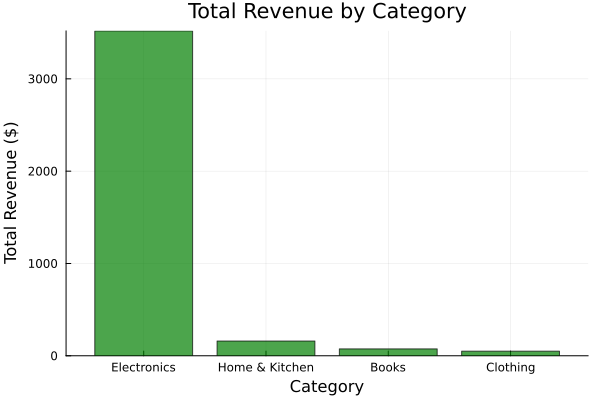

In [174]:
p2 = bar(
    four_table_agg_df.category_name,
    four_table_agg_df.total_revenue,
    title="Total Revenue by Category",
    xlabel="Category",
    ylabel="Total Revenue (\$)",
    legend=false,
    color=:green,
    alpha=0.7
)

In [175]:

demographics_query = """
    SELECT 
        CASE 
            WHEN c.age < 30 THEN 'Under 30'
            WHEN c.age >= 30 AND c.age < 40 THEN '30-39'
            ELSE '40 and over'
        END as age_group,
        cat.category_name,
        COUNT(p.purchase_id) AS purchase_count,
        SUM(p.total_price) AS total_spent,
        AVG(p.total_price) AS average_purchase_value
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    JOIN 
        product_categories cat ON pr.category_id = cat.category_id
    GROUP BY 
        age_group, cat.category_name
    ORDER BY 
        age_group, total_spent DESC
"""
demographics_df = DBInterface.execute(db, demographics_query) |> DataFrame

Row,age_group,category_name,purchase_count,total_spent,average_purchase_value
,String,String,Int64,Float64,Float64
1,30-39,Electronics,4,2219.96,554.99
2,30-39,Home & Kitchen,2,159.98,79.99
3,40 and over,Electronics,1,1299.99,1299.99
4,40 and over,Books,1,44.97,44.97
5,Under 30,Clothing,1,49.98,49.98
6,Under 30,Books,1,29.99,29.99


In [180]:
complex_join_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        cat.category_name,
        COUNT(p.purchase_id) AS purchase_count,
        SUM(p.total_price) AS total_spent
    FROM 
        customers c
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id AND pr.price > 50
    JOIN 
        product_categories cat ON pr.category_id = cat.category_id
    WHERE 
        c.is_active = 1 AND p.purchase_date > '2023-05-01'
    GROUP BY 
        c.customer_id, cat.category_name
    HAVING 
        COUNT(p.purchase_id) > 0
    ORDER BY 
        c.customer_id, total_spent DESC
"""
complex_join_df = DBInterface.execute(db, complex_join_query) |> DataFrame

Row,customer_id,customer_name,category_name,purchase_count,total_spent
,Int64,String,String,Int64,Float64
1,1,John Doe,Electronics,1,899.99
2,1,John Doe,Home & Kitchen,1,69.99
3,5,Michael Brown,Electronics,2,1099.98
4,5,Michael Brown,Home & Kitchen,1,89.99
5,6,Sarah Johnson,Electronics,1,219.989


In [181]:

subquery_join_query = """
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        cat.category_name,
        recent_purchases.purchase_count,
        recent_purchases.total_spent
    FROM 
        customers c
    JOIN 
        (SELECT 
            customer_id, 
            COUNT(p.purchase_id) AS purchase_count,
            SUM(p.total_price) AS total_spent
         FROM purchases p
         WHERE p.purchase_date > '2023-05-01'
         GROUP BY customer_id) AS recent_purchases ON c.customer_id = recent_purchases.customer_id
    JOIN 
        purchases p ON c.customer_id = p.customer_id
    JOIN 
        products pr ON p.product_id = pr.product_id
    JOIN 
        product_categories cat ON pr.category_id = cat.category_id
    GROUP BY 
        c.customer_id, cat.category_name
    ORDER BY 
        recent_purchases.total_spent DESC, cat.category_name
"""
subquery_join_df = DBInterface.execute(db, subquery_join_query) |> DataFrame

Row,customer_id,customer_name,category_name,purchase_count,total_spent
,Int64,String,String,Int64,Float64
1,3,Robert Johnson,Books,1,1299.99
2,3,Robert Johnson,Electronics,1,1299.99
3,5,Michael Brown,Electronics,3,1189.97
4,5,Michael Brown,Home & Kitchen,3,1189.97
5,1,John Doe,Electronics,2,969.98
6,1,John Doe,Home & Kitchen,2,969.98
7,6,Sarah Johnson,Electronics,1,219.989
8,2,Jane Smith,Books,2,79.97
9,2,Jane Smith,Clothing,2,79.97


In [182]:

cte_join_query = """
    WITH CustomerPurchases AS (
        SELECT 
            c.customer_id,
            c.first_name || ' ' || c.last_name AS customer_name,
            c.age,
            c.income,
            COUNT(p.purchase_id) AS purchase_count,
            SUM(p.total_price) AS total_spent
        FROM 
            customers c
        LEFT JOIN 
            purchases p ON c.customer_id = p.customer_id
        GROUP BY 
            c.customer_id
    ),
    CategorySales AS (
        SELECT 
            cat.category_id,
            cat.category_name,
            COUNT(p.purchase_id) AS sale_count,
            SUM(p.total_price) AS category_revenue
        FROM 
            product_categories cat
        JOIN 
            products pr ON cat.category_id = pr.category_id
        JOIN 
            purchases p ON pr.product_id = p.product_id
        GROUP BY 
            cat.category_id
    ),
    CustomerCategorySales AS (
        SELECT 
            c.customer_id,
            cat.category_id,
            COUNT(p.purchase_id) AS category_purchase_count,
            SUM(p.total_price) AS category_spent
        FROM 
            customers c
        JOIN 
            purchases p ON c.customer_id = p.customer_id
        JOIN 
            products pr ON p.product_id = pr.product_id
        JOIN 
            product_categories cat ON pr.category_id = cat.category_id
        GROUP BY 
            c.customer_id, cat.category_id
    )
    SELECT 
        cp.customer_id,
        cp.customer_name,
        cp.age,
        cp.income,
        cp.purchase_count,
        cp.total_spent,
        cs.category_name,
        ccs.category_purchase_count,
        ccs.category_spent,
        ROUND(ccs.category_spent / cp.total_spent * 100, 2) AS category_percentage,
        ROUND(ccs.category_spent / cs.category_revenue * 100, 2) AS customer_category_contribution
    FROM 
        CustomerPurchases cp
    JOIN 
        CustomerCategorySales ccs ON cp.customer_id = ccs.customer_id
    JOIN 
        CategorySales cs ON ccs.category_id = cs.category_id
    ORDER BY 
        cp.total_spent DESC, cs.category_name
"""
cte_join_df = DBInterface.execute(db, cte_join_query) |> DataFrame


Row,customer_id,customer_name,age,income,purchase_count,total_spent,category_name,category_purchase_count,category_spent,category_percentage,customer_category_contribution
,Int64,String,Int64,Float64,Int64,Float64,String,Int64,Float64,Float64,Float64
1,3,Robert Johnson,42,95000.0,2,1344.96,Books,1,44.97,3.34,59.99
2,3,Robert Johnson,42,95000.0,2,1344.96,Electronics,1,1299.99,96.66,36.93
3,5,Michael Brown,39,84460.5,3,1189.97,Electronics,2,1099.98,92.44,31.25
4,5,Michael Brown,39,84460.5,3,1189.97,Home & Kitchen,1,89.99,7.56,56.25
5,1,John Doe,36,80000.0,2,969.98,Electronics,1,899.99,92.78,25.57
6,1,John Doe,36,80000.0,2,969.98,Home & Kitchen,1,69.99,7.22,43.75
7,6,Sarah Johnson,33,71000.0,1,219.989,Electronics,1,219.989,100.0,6.25
8,2,Jane Smith,28,65100.8,2,79.97,Books,1,29.99,37.5,40.01
9,2,Jane Smith,28,65100.8,2,79.97,Clothing,1,49.98,62.5,49.99


In [185]:
union_query = """
    -- Customer-level summary
    SELECT 
        c.customer_id AS id,
        c.first_name || ' ' || c.last_name AS name,
        'Customer' AS type,
        COUNT(p.purchase_id) AS transaction_count,
        SUM(p.total_price) AS total_amount,
        NULL AS category
    FROM 
        customers c
    LEFT JOIN 
        purchases p ON c.customer_id = p.customer_id
    GROUP BY 
        c.customer_id
    
    UNION
    
    -- Category-level summary
    SELECT 
        cat.category_id AS id,
        cat.category_name AS name,
        'Category' AS type,
        COUNT(p.purchase_id) AS transaction_count,
        SUM(p.total_price) AS total_amount,
        NULL AS category
    FROM 
        product_categories cat
    LEFT JOIN 
        products pr ON cat.category_id = pr.category_id
    LEFT JOIN 
        purchases p ON pr.product_id = p.product_id
    GROUP BY 
        cat.category_id
    
    UNION
    
    -- Product-level summary
    SELECT 
        pr.product_id AS id,
        pr.product_name AS name,
        'Product' AS type,
        COUNT(p.purchase_id) AS transaction_count,
        SUM(p.total_price) AS total_amount,
        cat.category_name AS category
    FROM 
        products pr
    LEFT JOIN 
        product_categories cat ON pr.category_id = cat.category_id
    LEFT JOIN 
        purchases p ON pr.product_id = p.product_id
    GROUP BY 
        pr.product_id
    
    ORDER BY 
        type, total_amount DESC NULLS LAST
"""
union_df = DBInterface.execute(db, union_query) |> DataFrame

Row,id,name,type,transaction_count,total_amount,category
,Int64,String,String,Int64,Float64?,String?
1,1,Electronics,Category,5,3519.95,missing
2,3,Home & Kitchen,Category,2,159.98,missing
3,2,Clothing,Category,2,99.97,missing
4,4,Books,Category,2,74.96,missing
5,5,Toys,Category,0,missing,missing
6,3,Robert Johnson,Customer,2,1344.96,missing
7,5,Michael Brown,Customer,3,1189.97,missing
8,1,John Doe,Customer,2,969.98,missing
9,6,Sarah Johnson,Customer,1,219.989,missing


In [186]:
customers_report = filter(row -> row.type == "Customer", union_df)
categories_report = filter(row -> row.type == "Category", union_df)
products_report = filter(row -> row.type == "Product", union_df)


Row,id,name,type,transaction_count,total_amount,category
,Int64,String,String,Int64,Float64?,String?
1,1,Smartphone,Product,2,1799.98,Electronics
2,2,Laptop,Product,1,1299.99,Electronics
3,3,Headphones,Product,2,419.979,Electronics
4,6,Coffee Maker,Product,1,89.99,Home & Kitchen
5,7,Blender,Product,1,69.99,Home & Kitchen
6,5,Jeans,Product,1,49.99,Clothing
7,4,T-shirt,Product,1,49.98,Clothing
8,8,Novel,Product,1,44.97,Books
9,9,Cookbook,Product,1,29.99,Books


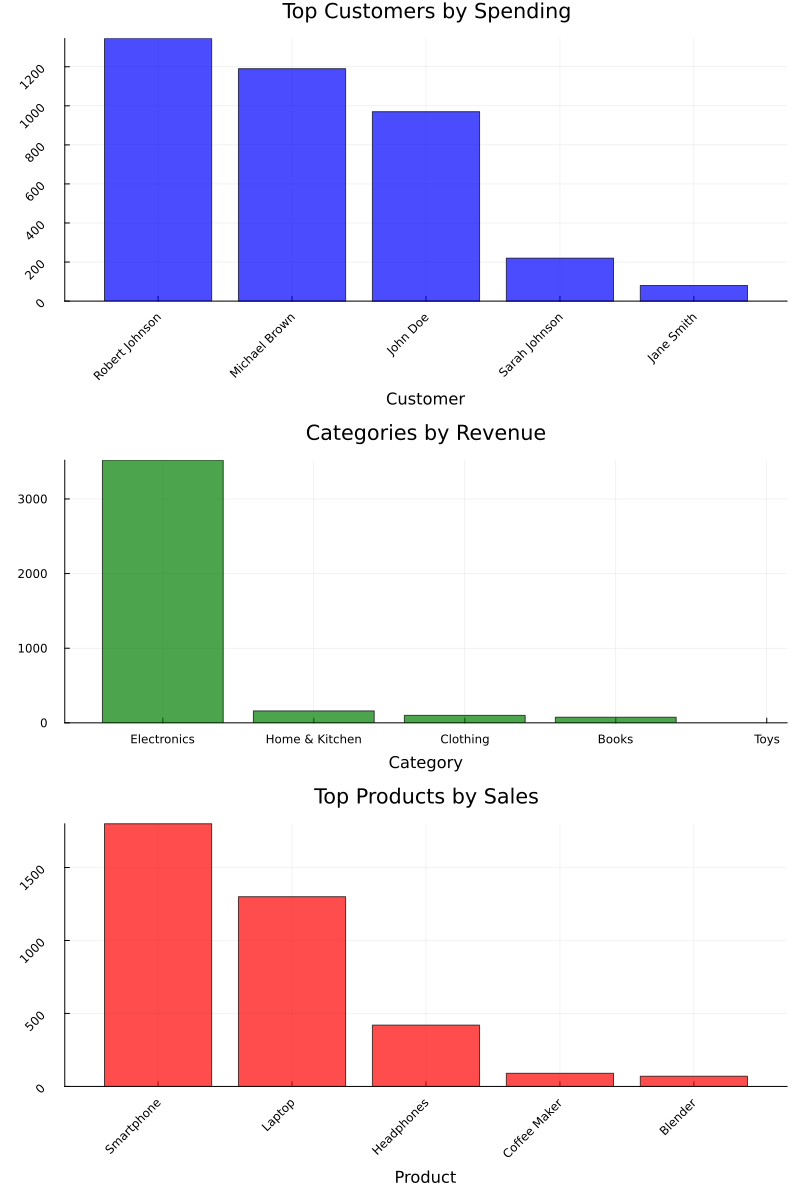

In [ ]:
p5a = bar(
    customers_report.name[1:min(5, nrow(customers_report))],
    customers_report.total_amount[1:min(5, nrow(customers_report))],
    title="Top Customers by Spending",
    xlabel="Customer",
    ylabel="Total Spent (\$)",
    legend=false,
    color=:blue,
    alpha=0.7,
    rotation=45,
    tickfont=font(8)
)

p5b = bar(
    categories_report.name,
    categories_report.total_amount,
    title="Categories by Revenue",
    xlabel="Category",
    ylabel="Total Revenue (\$)",
    legend=false,
    color=:green,
    alpha=0.7
)

p5c = bar(
    products_report.name[1:min(5, nrow(products_report))],
    products_report.total_amount[1:min(5, nrow(products_report))],
    title="Top Products by Sales",
    xlabel="Product",
    ylabel="Total Sales (\$)",
    legend=false,
    color=:red,
    alpha=0.7,
    rotation=45,
    tickfont=font(8)
)

p5 = plot(p5a, p5b, p5c, layout=(3, 1), size=(800, 1200))